In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [2]:
df = pd.read_excel(r'data_original/solar_stations/Solar station site 1 (Nominal capacity-50MW).xlsx'
                                ).drop(index=0)

In [3]:
df.head()

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
1,2019-01-01 00:15:00,0,0,0,-11.8,930.5,39.3,0.0
2,2019-01-01 00:30:00,0,0,0,-11.4,930.5,39.0,0.0
3,2019-01-01 00:45:00,0,0,0,-11.5,930.5,38.0,0.0
4,2019-01-01 01:00:00,0,0,0,-11.5,930.4,38.9,0.0
5,2019-01-01 01:15:00,0,0,0,-11.8,930.1,39.6,0.0


In [4]:
df.columns=['time','TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']

In [5]:
df.drop(['TSI', 'DNI','GHI','Air_T','Air_P','Air_H'], axis=1,inplace=True)

In [6]:
df.head()

,time,Power(MW)
1,2019-01-01 00:15:00,0.0
2,2019-01-01 00:30:00,0.0
3,2019-01-01 00:45:00,0.0
4,2019-01-01 01:00:00,0.0
5,2019-01-01 01:15:00,0.0


In [7]:
time_format = "%Y-%m-%d %H:%M:%S"

In [8]:
x= df['time'][1]
y = datetime.strptime(x , time_format)
print(y.year)

2019


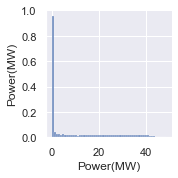

In [9]:
sns.pairplot(df)

In [10]:
df['Year']=df['time'].apply(lambda x: time.strptime(x,"%Y-%m-%d %H:%M:%S")[0])
df['Month']=df['time'].apply(lambda x: time.strptime(x,"%Y-%m-%d %H:%M:%S")[1])
df['Day']=df['time'].apply(lambda x: time.strptime(x,"%Y-%m-%d %H:%M:%S")[2])
df['Time_Hours']=df['time'].apply(lambda x: time.strptime(x,"%Y-%m-%d %H:%M:%S")[3])
df['Time_Minutes']=df['time'].apply(lambda x: time.strptime(x,"%Y-%m-%d %H:%M:%S")[4])
df.head(10)

,time,Power(MW),Year,Month,Day,Time_Hours,Time_Minutes
1,2019-01-01 00:15:00,0.0,2019,1,1,0,15
2,2019-01-01 00:30:00,0.0,2019,1,1,0,30
3,2019-01-01 00:45:00,0.0,2019,1,1,0,45
4,2019-01-01 01:00:00,0.0,2019,1,1,1,0
5,2019-01-01 01:15:00,0.0,2019,1,1,1,15
6,2019-01-01 01:30:00,0.0,2019,1,1,1,30
7,2019-01-01 01:45:00,0.0,2019,1,1,1,45
8,2019-01-01 02:00:00,0.0,2019,1,1,2,0
9,2019-01-01 02:15:00,0.0,2019,1,1,2,15
10,2019-01-01 02:30:00,0.0,2019,1,1,2,30


In [11]:
df.time=pd.to_datetime(df["time"], format = "%Y-%m-%d %H:%M:%S", errors = "coerce")

In [12]:
df.dtypes

time            datetime64[ns]
Power(MW)              float64
Year                     int64
Month                    int64
Day                      int64
Time_Hours               int64
Time_Minutes             int64
dtype: object

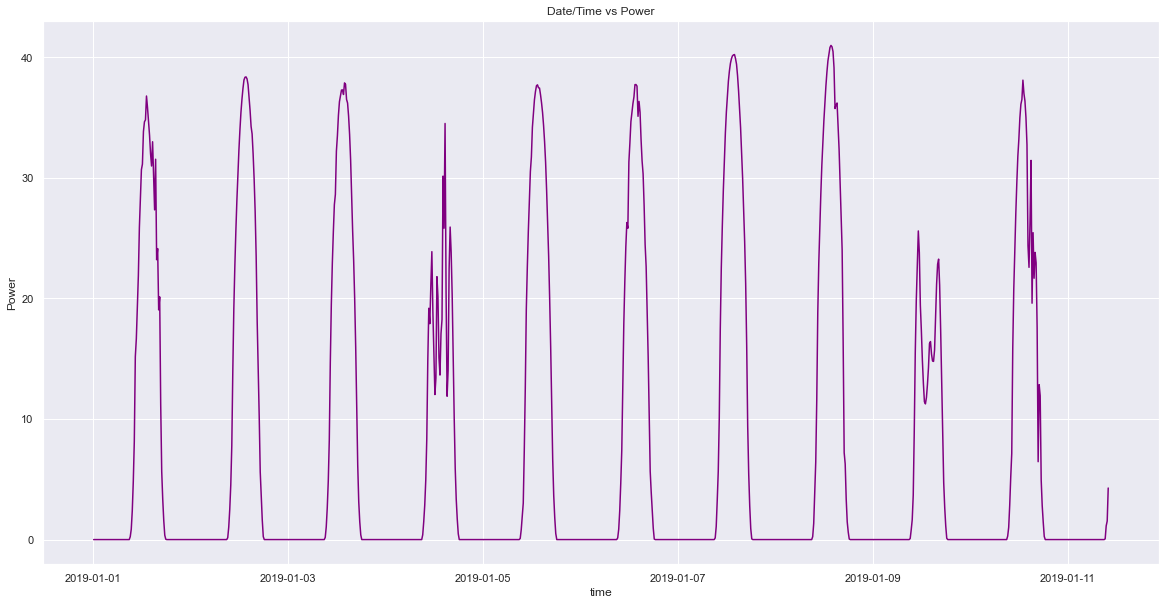

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(df['time'][0:1000],
        df['Power(MW)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="time",
       ylabel="Power",
       title="Date/Time vs Power")
plt.savefig('./time vs Power(10days)')

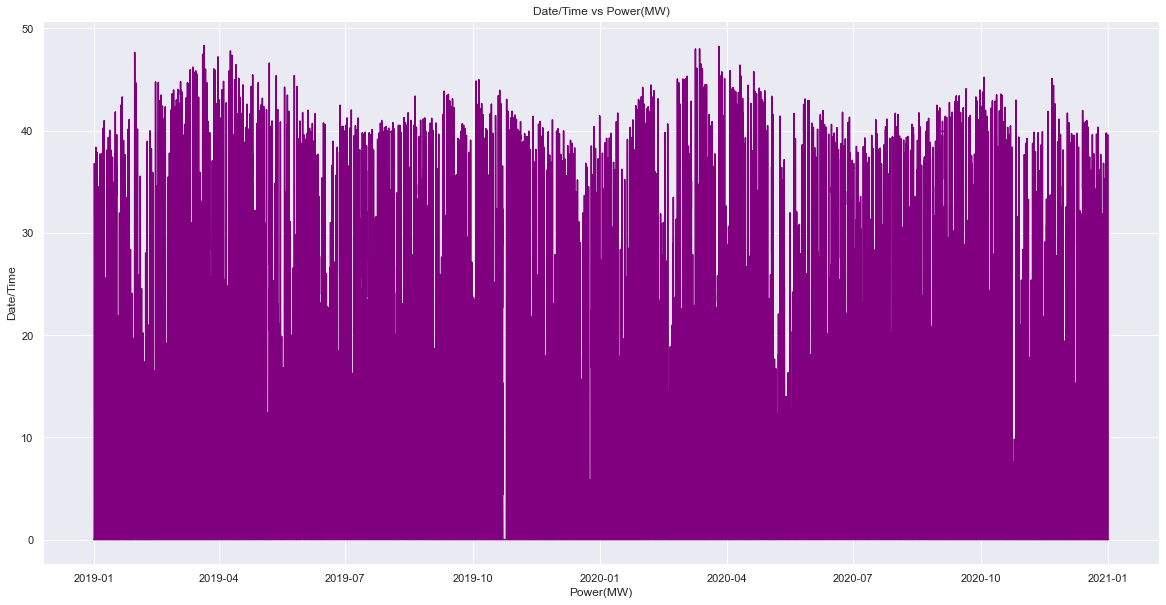

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(df['time'],
        df['Power(MW)'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Power(MW)",
       ylabel="Date/Time",
       title="Date/Time vs Power(MW)")
plt.savefig('./time vs Power')

In [15]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

<ipython-input-15-66b0dd25839b>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [16]:
df = df.set_index('time')

In [17]:
batch_size_exp = 1
epoch_exp = 10
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [18]:
df1= df.drop(['Year', 'Month','Day','Time_Hours','Time_Minutes'], axis=1)

In [19]:
df1.head()

,Power(MW)
time,
2019-01-01 00:15:00,0.0
2019-01-01 00:30:00,0.0
2019-01-01 00:45:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 01:15:00,0.0


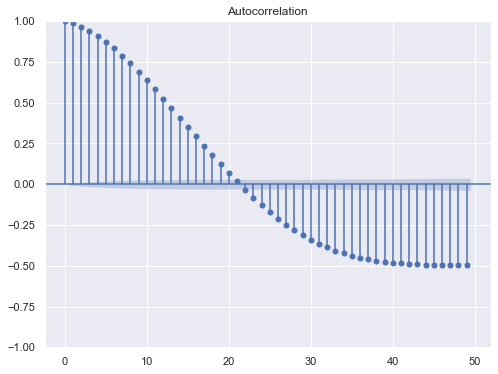

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1);

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


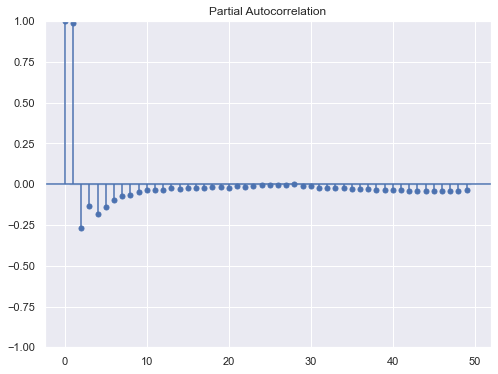

In [21]:
plot_pacf(df1);

In [22]:
import numpy as np

def sampling(sequence, n_steps):
    
    X, Y = list(), list()

    for i in range(len(sequence)):

        sam = i + n_steps
        if sam > len(sequence)-1:
            break

        x, y = sequence[i:sam], sequence[sam]

        X.append(x)

        Y.append(y)

    return np.array(X), np.array(Y)

In [23]:
n_steps = 3

X, Y = sampling(df1['Power(MW)'].tolist(), n_steps)

In [24]:
for i in range(len(X)):

    print(X[i], Y[i])

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.238533
[0.       0.       0.238533] 0.856733
[0.       0.238533 0.856733] 2.3806
[0.238533 0.856733 2.3806  ] 4.8044
[0.856733 2.3806   4.8044  ] 8.131133
[2.3806   4.8044   8.131133] 15.160066
[ 4.8044    8.131133 15.160066] 16.656599
[ 8.131133 15.160066 16.656599] 19.275133
[15.160066 16.656599 19.275133] 21.893333
[16.656599 19.275133 21.893333] 25.868465
[19.275133 21.893333 25.868465] 28.310266
[21.893333 25.868465 28.310266] 30.6696
[25.868465 28.310266 30.6696  ] 31.126131
[28.31

[37.594265 38.748066 39.686867] 40.2742
[38.748066 39.686867 40.2742  ] 40.798733
[39.686867 40.2742   40.798733] 40.969666
[40.2742   40.798733 40.969666] 40.856266
[40.798733 40.969666 40.856266] 40.462265
[40.969666 40.856266 40.462265] 39.118465
[40.856266 40.462265 39.118465] 35.73593
[40.462265 39.118465 35.73593 ] 36.05413
[39.118465 35.73593  36.05413 ] 36.194866
[35.73593  36.05413  36.194866] 34.35253
[36.05413  36.194866 34.35253 ] 32.337467
[36.194866 34.35253  32.337467] 29.697132
[34.35253  32.337467 29.697132] 26.810799
[32.337467 29.697132 26.810799] 24.006266
[29.697132 26.810799 24.006266] 16.319332
[26.810799 24.006266 16.319332] 7.205933
[24.006266 16.319332  7.205933] 6.270333
[16.319332  7.205933  6.270333] 3.348533
[7.205933 6.270333 3.348533] 1.468267
[6.270333 3.348533 1.468267] 0.6198
[3.348533 1.468267 0.6198  ] 0.044133
[1.468267 0.6198   0.044133] 0.0
[0.6198   0.044133 0.      ] 0.0
[0.044133 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 

[ 7.8794   10.6068    9.271866] 5.0478
[10.6068    9.271866  5.0478  ] 2.532
[9.271866 5.0478   2.532   ] 1.340067
[5.0478   2.532    1.340067] 0.337733
[2.532    1.340067 0.337733] 0.0
[1.340067 0.337733 0.      ] 0.0
[0.337733 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.010267
[0.       0.       0.010267] 0.517533
[0.       0.010267 0.517533] 2.425067
[0.010267 0.517533 2.425067] 5.187333
[0.517533 2.425067 5.187333] 9.8966
[2.425067 5.187333 9.8966  ] 17.6888
[ 5.187333  9.8966   17.6888  ] 22.830666
[ 9.8966   17.6888   22.830666] 26.440931
[17.6888   22.830666 26.440931] 29.254599
[22.830666 26.440931 29.254599] 31.450266
[26.440931 29.254599 31.450266] 33.691265
[29.254599 31.450266 33.691265] 35.653866
[31.450266 33.691265 35.653866] 37.0062
[33.691265 35.653866 37.0062  ] 38.6294
[35.653866 37.0062   38.6294  ] 39.918198
[37.0062   38.6294   39.918198] 41.084064
[38.6294   39.918198 41.084064] 41.90673
[39.918198 41.084064 41.90673 ] 42.6518
[41.084064 41.90673  42.6518  ] 43.132465
[41.90673  42.6518   43.132465] 43.285267
[42.6518   43.132465 43.285267] 43.27993
[43.132465 43.285267 43.27993 ] 43.102665
[43.285267 43.27993  43.102665] 42.582596
[43.27993  4

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.4064
[0.     0.     0.4064] 1.130467
[0.       0.4064   1.130467] 3.0338
[0.4064   1.130467 3.0338  ] 5.124733
[1.130467 3.0338   5.124733] 6.506267
[3.0338   5.124733 6.506267] 6.553267
[5.124733 6.506267 6.553267] 10.814533
[ 6.506267  6.553267 10.814533] 17.35
[ 6.553267 10.814533 17.35    ] 20.020132
[10.814533 17.35     20.020132] 24.077732
[17.35     20.020132 24.077732] 13.505
[20.020132 24.077732 13.505   ] 23.231733
[24.077732 13.505    23.231733] 20.027733
[13.505    23.231733 20.027733] 15.726466
[23.231733 20.027733 15.726466] 12.9362
[20.027733 15.726466 12.9362  ] 14.241866
[15.726466 12.9362   14.241866] 10.8516
[12.9362   14.241866 10.8516  ] 8.279533
[14.241866 10.8516    8.279533] 11.690666
[10.8516    8.279533 11.690666] 7.196333
[ 8.279533 11.690666  7.196333] 6.672267
[11.690666  7.196333  6.672267] 8.446866
[7.196333 6.672267 8.446866] 12.5118
[ 6.672267  8.446866 12.5118  ] 8.

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.208333
[0.       0.       0.208333] 0.895
[0.       0.208333 0.895   ] 2.012267
[0.208333 0.895    2.012267] 3.466
[0.895    2.012267 3.466   ] 5.108933
[2.012267 3.466    5.108933] 7.507533
[3.466    5.108933 7.507533] 10.896466
[ 5.108933  7.507533 10.896466] 13.994199
[ 7.507533 10.896466 13.994199] 16.767933
[10.896466 13.994199 16.767933] 19.501066
[13.994199 16.767933 19.501066] 21.738132
[16.767933 19.501066 21.738132] 23.991667
[19.501066 21.738132 23.991667] 26.2916
[21.738132 23.991667 26.2916  ] 28.120264
[23.991667 26.2916   28.120264] 29.220465
[26.2916   28.120264 29.220465] 30.9882
[28.120264 29.220465 30.9882  ] 32.244064
[29.220465 30.9882   32.244064] 33.6112
[30.9882   32.244064 33.6112  ] 34.98873
[32.244064 33.6112   34.98873 ] 35.187065
[33.6112   34.98873  35.187065] 35.53593
[34.98873  35.187065 35.53593 ] 34.987465
[35.187065 35.53593  34.987465] 34.489132
[35

[0. 0. 0.] 0.0
[0. 0. 0.] 0.018333
[0.       0.       0.018333] 0.5874
[0.       0.018333 0.5874  ] 1.948467
[0.018333 0.5874   1.948467] 3.926667
[0.5874   1.948467 3.926667] 6.532133
[1.948467 3.926667 6.532133] 10.2578
[ 3.926667  6.532133 10.2578  ] 13.546066
[ 6.532133 10.2578   13.546066] 17.2118
[10.2578   13.546066 17.2118  ] 20.325733
[13.546066 17.2118   20.325733] 23.317999
[17.2118   20.325733 23.317999] 26.032131
[20.325733 23.317999 26.032131] 28.835066
[23.317999 26.032131 28.835066] 30.449467
[26.032131 28.835066 30.449467] 32.545265
[28.835066 30.449467 32.545265] 33.7292
[30.449467 32.545265 33.7292  ] 35.911865
[32.545265 33.7292   35.911865] 35.767067
[33.7292   35.911865 35.767067] 36.16553
[35.911865 35.767067 36.16553 ] 39.26213
[35.767067 36.16553  39.26213 ] 39.315468
[36.16553  39.26213  39.315468] 39.9702
[39.26213  39.315468 39.9702  ] 38.672398
[39.315468 39.9702   38.672398] 37.78773
[39.9702   38.672398 37.78773 ] 35.314
[38.672398 37.78773  35.314   ] 32

[18.887466 15.037333 22.911734] 31.301132
[15.037333 22.911734 31.301132] 33.989597
[22.911734 31.301132 33.989597] 36.701866
[31.301132 33.989597 36.701866] 33.906464
[33.989597 36.701866 33.906464] 21.747066
[36.701866 33.906464 21.747066] 32.721535
[33.906464 21.747066 32.721535] 35.6928
[21.747066 32.721535 35.6928  ] 37.009132
[32.721535 35.6928   37.009132] 31.800133
[35.6928   37.009132 31.800133] 29.149265
[37.009132 31.800133 29.149265] 34.063465
[31.800133 29.149265 34.063465] 40.972664
[29.149265 34.063465 40.972664] 44.712666
[34.063465 40.972664 44.712666] 36.44773
[40.972664 44.712666 36.44773 ] 30.732866
[44.712666 36.44773  30.732866] 25.2078
[36.44773  30.732866 25.2078  ] 22.733398
[30.732866 25.2078   22.733398] 25.766533
[25.2078   22.733398 25.766533] 28.155533
[22.733398 25.766533 28.155533] 27.867867
[25.766533 28.155533 27.867867] 27.831999
[28.155533 27.867867 27.831999] 21.215666
[27.867867 27.831999 21.215666] 20.219799
[27.831999 21.215666 20.219799] 14.7659

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.1126
[0.     0.     0.1126] 0.8782
[0.     0.1126 0.8782] 2.545267
[0.1126   0.8782   2.545267] 4.190333
[0.8782   2.545267 4.190333] 8.043133
[2.545267 4.190333 8.043133] 12.293799
[ 4.190333  8.043133 12.293799] 16.642134
[ 8.043133 12.293799 16.642134] 18.2948
[12.293799 16.642134 18.2948  ] 15.9656
[16.6421

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.463933
[0.       0.       0.463933] 1.9388
[0.       0.463933 1.9388  ] 4.342467
[0.463933 1.9388   4.342467] 7.547466
[1.9388   4.342467 7.547466] 11.303266
[ 4.342467  7.547466 11.303266] 14.765133
[ 7.547466 11.303266 14.765133] 18.018932
[11.303266 14.765133 18.018932] 21.133799
[14.765133 18.018932 21.133799] 23.9604
[18.018932 21.133799 23.9604  ] 26.6342
[21.133799 23.9604   26

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.085067
[0.       0.       0.085067] 0.614067
[0.       0.085067 0.614067] 1.924333
[0.085067 0.614067 1.924333] 3.6832
[0.614067 1.924333 3.6832  ] 5.447333
[1.924333 3.6832   5.447333] 7.678533
[3.6832   5.447333 7.678533] 9.663067
[5.447333 7.678533 9.663067] 12.0192
[ 7.678533  9.663067 12.0192  ] 15.053599
[ 9.663067 12.0192   15.053599] 16.720667
[12.0192   15.053599 16.720667] 19.074865
[15.053599 16.720667 19.074865] 19.818533
[16.720667 19.074865 19.818533] 23.062666
[19.074865 19.818533 23.062666] 25.636133
[19.818533 23.062666 25.636133] 28.1468
[23.062666 25.636133 28.1468  ] 33.53253
[25.636133 28.1468   33.53253 ] 27.790333
[28.1468   33.53253  27.790333] 27.949133
[33.53253  27.790333 27.949133] 36.02133
[27.790333 27.949133 36.02133 ] 39.557266
[27.949133 36.02133  39.557266] 37.593998
[36.02133  39.557266 37.593998] 35.90806

[6.0414   3.238933 0.739733] 0.035
[3.238933 0.739733 0.035   ] 0.0
[0.739733 0.035    0.      ] 0.0
[0.035 0.    0.   ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0722
[0.     0.     0.0722] 0.795267
[0.       0.0722   0.795267] 2.241
[0.0722   0.795267 2.241   ] 4.209067
[0.795267 2.241    4.209067] 8.904933
[2.241    4.209067 8.904

[0.1722   0.964533 2.432733] 3.7574
[0.964533 2.432733 3.7574  ] 6.001467
[2.432733 3.7574   6.001467] 9.877733
[3.7574   6.001467 9.877733] 11.1914
[ 6.001467  9.877733 11.1914  ] 11.1938
[ 9.877733 11.1914   11.1938  ] 14.549133
[11.1914   11.1938   14.549133] 12.575066
[11.1938   14.549133 12.575066] 17.852
[14.549133 12.575066 17.852   ] 18.632265
[12.575066 17.852    18.632265] 21.460266
[17.852    18.632265 21.460266] 18.773266
[18.632265 21.460266 18.773266] 24.028599
[21.460266 18.773266 24.028599] 33.0892
[18.773266 24.028599 33.0892  ] 28.820332
[24.028599 33.0892   28.820332] 26.262
[33.0892   28.820332 26.262   ] 30.854332
[28.820332 26.262    30.854332] 30.601
[26.262    30.854332 30.601   ] 28.7036
[30.854332 30.601    28.7036  ] 27.776533
[30.601    28.7036   27.776533] 26.627867
[28.7036   27.776533 26.627867] 26.105865
[27.776533 26.627867 26.105865] 26.739532
[26.627867 26.105865 26.739532] 26.448265
[26.105865 26.739532 26.448265] 26.585133
[26.739532 26.448265 26.58

[21.734    21.758265 18.119865] 8.312466
[21.758265 18.119865  8.312466] 6.5824
[18.119865  8.312466  6.5824  ] 4.6578
[8.312466 6.5824   4.6578  ] 3.994067
[6.5824   4.6578   3.994067] 5.0142
[4.6578   3.994067 5.0142  ] 3.8358
[3.994067 5.0142   3.8358  ] 3.720333
[5.0142   3.8358   3.720333] 2.7168
[3.8358   3.720333 2.7168  ] 0.912467
[3.720333 2.7168   0.912467] 0.068333
[2.7168   0.912467 0.068333] 0.0
[0.912467 0.068333 0.      ] 0.0
[0.068333 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0

[0.       0.1772   1.129867] 2.4992
[0.1772   1.129867 2.4992  ] 4.082267
[1.129867 2.4992   4.082267] 6.750067
[2.4992   4.082267 6.750067] 9.8404
[4.082267 6.750067 9.8404  ] 13.040266
[ 6.750067  9.8404   13.040266] 16.307934
[ 9.8404   13.040266 16.307934] 13.084733
[13.040266 16.307934 13.084733] 13.099133
[16.307934 13.084733 13.099133] 21.123533
[13.084733 13.099133 21.123533] 21.1444
[13.099133 21.123533 21.1444  ] 24.597198
[21.123533 21.1444   24.597198] 26.618866
[21.1444   24.597198 26.618866] 28.1938
[24.597198 26.618866 28.1938  ] 32.9964
[26.618866 28.1938   32.9964  ] 36.129864
[28.1938   32.9964   36.129864] 34.863464
[32.9964   36.129864 34.863464] 34.19393
[36.129864 34.863464 34.19393 ] 32.281464
[34.863464 34.19393  32.281464] 38.368134
[34.19393  32.281464 38.368134] 39.73273
[32.281464 38.368134 39.73273 ] 39.269466
[38.368134 39.73273  39.269466] 37.994534
[39.73273  39.269466 37.994534] 38.554665
[39.269466 37.994534 38.554665] 40.654133
[37.994534 38.554665 40

[0.007333 0.757267 2.522267] 3.6458
[0.757267 2.522267 3.6458  ] 3.752333
[2.522267 3.6458   3.752333] 6.144933
[3.6458   3.752333 6.144933] 8.993133
[3.752333 6.144933 8.993133] 12.717133
[ 6.144933  8.993133 12.717133] 14.777733
[ 8.993133 12.717133 14.777733] 11.8562
[12.717133 14.777733 11.8562  ] 16.144
[14.777733 11.8562   16.144   ] 18.4056
[11.8562 16.144  18.4056] 26.5514
[16.144  18.4056 26.5514] 24.455732
[18.4056   26.5514   24.455732] 23.361198
[26.5514   24.455732 23.361198] 17.542732
[24.455732 23.361198 17.542732] 22.517666
[23.361198 17.542732 22.517666] 34.78113
[17.542732 22.517666 34.78113 ] 40.4776
[22.517666 34.78113  40.4776  ] 41.309
[34.78113 40.4776  41.309  ] 42.438065
[40.4776   41.309    42.438065] 43.545933
[41.309    42.438065 43.545933] 44.21193
[42.438065 43.545933 44.21193 ] 44.6316
[43.545933 44.21193  44.6316  ] 45.140465
[44.21193  44.6316   45.140465] 45.204
[44.6316   45.140465 45.204   ] 45.778465
[45.140465 45.204    45.778465] 45.8298
[45.204  

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.2216
[0.     0.     0.2216] 0.859667
[0.       0.2216   0.859667] 1.7802
[0.2216   0.859667 1.7802  ] 3.132667
[0.859667 1.7802   3.132667] 5.214667
[1.7802   3.132667 5.214667] 8.187667
[3.132667 5.214667 8.187667] 11.272733
[ 5.214667  8.187667 11.272733] 14.358333
[ 8.187667 11.272733 14.358333] 17.446533
[11.272733 14.358333 17.446533] 20.067932
[14.358333 17.446533 20.067932] 24.291933
[17.446533 20.067932 24.291933] 27.567

[0.061467 0.617067 1.387067] 2.3142
[0.617067 1.387067 2.3142  ] 3.624267
[1.387067 2.3142   3.624267] 5.3728
[2.3142   3.624267 5.3728  ] 7.962467
[3.624267 5.3728   7.962467] 10.576599
[ 5.3728    7.962467 10.576599] 13.371933
[ 7.962467 10.576599 13.371933] 16.2546
[10.576599 13.371933 16.2546  ] 18.998133
[13.371933 16.2546   18.998133] 21.750732
[16.2546   18.998133 21.750732] 24.452267
[18.998133 21.750732 24.452267] 26.889599
[21.750732 24.452267 26.889599] 29.031666
[24.452267 26.889599 29.031666] 31.048065
[26.889599 29.031666 31.048065] 32.72053
[29.031666 31.048065 32.72053 ] 34.069
[31.048065 32.72053  34.069   ] 35.855732
[32.72053  34.069    35.855732] 37.272533
[34.069    35.855732 37.272533] 37.745064
[35.855732 37.272533 37.745064] 38.2814
[37.272533 37.745064 38.2814  ] 38.969067
[37.745064 38.2814   38.969067] 39.311
[38.2814   38.969067 39.311   ] 40.224464
[38.969067 39.311    40.224464] 39.490067
[39.311    40.224464 39.490067] 39.415333
[40.224464 39.490067 39.41

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.002667
[0.       0.       0.002667] 0.3538
[0.       0.002667 0.3538  ] 1.161067
[0.002667 0.3538   1.161067] 2.176933
[0.3538   1.161067 2.176933] 3.157733
[1.161067 2.176933 3.157733] 4.4224
[2.176933 3.157733 4.4224  ] 6.159
[3.157733 4.4224   6.159   ] 8.8806
[4.4224 6.159  8.8806] 11.6226
[ 6.159   8.8806 11.6226] 14.4118
[ 8.8806 11.6226 14.4118] 17.013466
[11.6226   14.4118   17.013466] 15.053266
[14.4118   17.013466 15.053266] 21.218266
[17.013466 15.053266 21.218266] 25.725733
[15.053266 21.21

[30.3948   32.580597 34.0742  ] 35.8606
[32.580597 34.0742   35.8606  ] 37.506264
[34.0742   35.8606   37.506264] 39.12553
[35.8606   37.506264 39.12553 ] 40.733265
[37.506264 39.12553  40.733265] 41.30173
[39.12553  40.733265 41.30173 ] 41.572533
[40.733265 41.30173  41.572533] 42.348133
[41.30173  41.572533 42.348133] 41.6724
[41.572533 42.348133 41.6724  ] 42.137264
[42.348133 41.6724   42.137264] 41.41973
[41.6724   42.137264 41.41973 ] 41.855732
[42.137264 41.41973  41.855732] 40.533466
[41.41973  41.855732 40.533466] 41.4682
[41.855732 40.533466 41.4682  ] 38.662266
[40.533466 41.4682   38.662266] 39.576
[41.4682   38.662266 39.576   ] 36.676132
[38.662266 39.576    36.676132] 36.92813
[39.576    36.676132 36.92813 ] 36.779266
[36.676132 36.92813  36.779266] 34.401466
[36.92813  36.779266 34.401466] 32.689667
[36.779266 34.401466 32.689667] 29.369331
[34.401466 32.689667 29.369331] 23.657866
[32.689667 29.369331 23.657866] 22.749466
[29.369331 23.657866 22.749466] 25.391932
[23.6

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.008667
[0.       0.       0.008667] 0.331067
[0.       0.008667 0.331067] 0.860733
[0.008667 0.331067 0.860733] 1.3538
[0.331067 0.860733 1.3538  ] 1.8988
[0.860733 1.3538   1.8988  ] 2.9888
[1.3538 1.8988 2.9888] 6.6954
[1.8988 2.9888 6.6954] 6.1526
[2.9888 6.6954 6.1526] 8.619467
[6.6954   6.1526   8.619467] 13.355866
[ 6.1526    8.619467 13.355866] 12.592933
[ 8.619467 13.355866 12.592933] 19.513065
[13.355866 12.592933 19.513065] 20.516466
[12.592933 19.513065 20.516466] 21.901865
[19.513065 20.516466 21.901865] 21.2246
[20.516466 21.901865 21.2246  ] 12.7454
[21.901865 21.2246   12.7454  ] 11.409533
[21.2246   12.7454   11.409533] 23.316265
[12.7454   11.409533 23.316265] 25.296
[11.409533 23.316265 25.296   ] 25.310799
[23.316265 25.296    25.310799] 22.129799


[13.846866 13.9696   13.7072  ] 13.568866
[13.9696   13.7072   13.568866] 13.587933
[13.7072   13.568866 13.587933] 13.702333
[13.568866 13.587933 13.702333] 14.317199
[13.587933 13.702333 14.317199] 12.884733
[13.702333 14.317199 12.884733] 13.905666
[14.317199 12.884733 13.905666] 16.2508
[12.884733 13.905666 16.2508  ] 14.4376
[13.905666 16.2508   14.4376  ] 15.575466
[16.2508   14.4376   15.575466] 14.4578
[14.4376   15.575466 14.4578  ] 10.882066
[15.575466 14.4578   10.882066] 7.201666
[14.4578   10.882066  7.201666] 7.045333
[10.882066  7.201666  7.045333] 2.074467
[7.201666 7.045333 2.074467] 1.2748
[7.045333 2.074467 1.2748  ] 1.040733
[2.074467 1.2748   1.040733] 1.251533
[1.2748   1.040733 1.251533] 0.698467
[1.040733 1.251533 0.698467] 0.192067
[1.251533 0.698467 0.192067] 0.0
[0.698467 0.192067 0.      ] 0.0
[0.192067 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0

[3.1828   4.272267 5.453733] 7.039267
[4.272267 5.453733 7.039267] 8.5914
[5.453733 7.039267 8.5914  ] 10.2912
[ 7.039267  8.5914   10.2912  ] 12.213533
[ 8.5914   10.2912   12.213533] 14.118666
[10.2912   12.213533 14.118666] 16.140467
[12.213533 14.118666 16.140467] 17.8702
[14.118666 16.140467 17.8702  ] 18.929466
[16.140467 17.8702   18.929466] 19.1052
[17.8702   18.929466 19.1052  ] 18.827599
[18.929466 19.1052   18.827599] 18.853533
[19.1052   18.827599 18.853533] 18.757133
[18.827599 18.853533 18.757133] 19.087267
[18.853533 18.757133 19.087267] 19.452534
[18.757133 19.087267 19.452534] 19.504866
[19.087267 19.452534 19.504866] 19.298532
[19.452534 19.504866 19.298532] 18.951866
[19.504866 19.298532 18.951866] 18.860132
[19.298532 18.951866 18.860132] 18.791399
[18.951866 18.860132 18.791399] 18.878933
[18.860132 18.791399 18.878933] 18.900932
[18.791399 18.878933 18.900932] 19.068998
[18.878933 18.900932 19.068998] 19.609934
[18.900932 19.068998 19.609934] 19.627466
[19.068998 

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0252
[0.     0.     0.0252] 0.409
[0.     0.0252 0.409 ] 1.179733
[0.0252   0.409    1.179733] 2.509667
[0.409    1.179733 2.509667] 2.9946
[1.179733 2.509667 2.9946  ] 5.757933
[2.509667 2.9946   5.757933] 7.767
[2.9946   5.757933 7.767   ] 2.661067
[5.757933 7.767    2.661067] 4.843667
[7.767    2.661067 4.843667] 4.7636
[2.661067 4.843667 4.7636  ] 4.9418
[4.843667 4.7636   4.9418  ] 9.2872
[4.7636 4.9418 9.2872] 20.3676
[ 4.9418  9.2872 20.3676] 11.199933
[ 9.2872   20.3676   11.199933] 18.905933
[20.3676   11.199933 18.905933] 20.9528
[11.199933 18.905933 20.9528  ] 22.5

[27.111265 29.263931 30.898464] 33.0498
[29.263931 30.898464 33.0498  ] 38.970066
[30.898464 33.0498   38.970066] 39.0868
[33.0498   38.970066 39.0868  ] 39.81433
[38.970066 39.0868   39.81433 ] 38.6004
[39.0868  39.81433 38.6004 ] 40.113266
[39.81433  38.6004   40.113266] 39.673065
[38.6004   40.113266 39.673065] 40.224865
[40.113266 39.673065 40.224865] 37.4034
[39.673065 40.224865 37.4034  ] 40.035065
[40.224865 37.4034   40.035065] 34.7972
[37.4034   40.035065 34.7972  ] 38.06573
[40.035065 34.7972   38.06573 ] 39.217667
[34.7972   38.06573  39.217667] 38.6404
[38.06573  39.217667 38.6404  ] 37.306133
[39.217667 38.6404   37.306133] 35.6712
[38.6404   37.306133 35.6712  ] 34.774933
[37.306133 35.6712   34.774933] 34.2584
[35.6712   34.774933 34.2584  ] 32.786533
[34.774933 34.2584   32.786533] 30.903
[34.2584   32.786533 30.903   ] 26.616266
[32.786533 30.903    26.616266] 25.877798
[30.903    26.616266 25.877798] 18.398266
[26.616266 25.877798 18.398266] 15.811266
[25.877798 18.39

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.094533
[0.       0.       0.094533] 0.721133
[0.       0.094533 0.721133] 1.3336
[0.094533 0.721133 1.3336  ] 2.0266
[0.721133 1.3336   2.0266  ] 3.347133
[1.3336   2.0266   3.347133] 5.2848
[2.0266   3.347133 5.2848  ] 4.561467
[3.347133 5.2848   4.561467] 5.259133
[5.2848   4.561467 5.259133] 8.347333
[4.561467 5.259133 8.347333] 8.2638
[5.259133 8.347333 8.2638  ] 8.0186
[8.347333 8.2638   8.0186  ] 11.000733
[ 8.2638    8.0186   11.000733] 13.330799
[ 8.0186   11.000733 13.330799] 18.208933
[11.000733 13.330799 18.208933] 16.098866
[13.330799 18.208933 16.098866] 24.198265
[18.208933 16.098866 24.198265] 25.516533
[16.098866 24.198265 25.516533] 30.333065
[24.198265 25.516533 30.333065] 28.551533
[25.516533 30.333065 28.551533] 28.7848
[30.333065 28.551533 28.784

[11.6102   14.3662   21.241467] 20.3498
[14.3662   21.241467 20.3498  ] 21.224533
[21.241467 20.3498   21.224533] 21.785267
[20.3498   21.224533 21.785267] 21.0838
[21.224533 21.785267 21.0838  ] 19.252533
[21.785267 21.0838   19.252533] 17.017
[21.0838   19.252533 17.017   ] 13.585533
[19.252533 17.017    13.585533] 11.908399
[17.017    13.585533 11.908399] 14.947933
[13.585533 11.908399 14.947933] 18.314
[11.908399 14.947933 18.314   ] 18.938398
[14.947933 18.314    18.938398] 22.012733
[18.314    18.938398 22.012733] 22.774134
[18.938398 22.012733 22.774134] 20.204065
[22.012733 22.774134 20.204065] 16.984133
[22.774134 20.204065 16.984133] 17.693666
[20.204065 16.984133 17.693666] 18.001
[16.984133 17.693666 18.001   ] 17.548065
[17.693666 18.001    17.548065] 16.486265
[18.001    17.548065 16.486265] 15.179533
[17.548065 16.486265 15.179533] 13.699066
[16.486265 15.179533 13.699066] 15.364933
[15.179533 13.699066 15.364933] 17.298866
[13.699066 15.364933 17.298866] 18.181398
[15.3

[2.555467 3.6642   5.238533] 9.471266
[3.6642   5.238533 9.471266] 12.6292
[ 5.238533  9.471266 12.6292  ] 13.2054
[ 9.471266 12.6292   13.2054  ] 11.648333
[12.6292   13.2054   11.648333] 9.286667
[13.2054   11.648333  9.286667] 17.512466
[11.648333  9.286667 17.512466] 18.2328
[ 9.286667 17.512466 18.2328  ] 25.2888
[17.512466 18.2328   25.2888  ] 28.984932
[18.2328   25.2888   28.984932] 28.654667
[25.2888   28.984932 28.654667] 17.7782
[28.984932 28.654667 17.7782  ] 31.748331
[28.654667 17.7782   31.748331] 34.9548
[17.7782   31.748331 34.9548  ] 27.832333
[31.748331 34.9548   27.832333] 17.760134
[34.9548   27.832333 17.760134] 35.607864
[27.832333 17.760134 35.607864] 23.8368
[17.760134 35.607864 23.8368  ] 17.017332
[35.607864 23.8368   17.017332] 21.032066
[23.8368   17.017332 21.032066] 19.0116
[17.017332 21.032066 19.0116  ] 25.136465
[21.032066 19.0116   25.136465] 24.344666
[19.0116   25.136465 24.344666] 22.777332
[25.136465 24.344666 22.777332] 13.695533
[24.344666 22.77

[36.174866 37.151997 37.9162  ] 38.21833
[37.151997 37.9162   38.21833 ] 39.1748
[37.9162  38.21833 39.1748 ] 39.73733
[38.21833 39.1748  39.73733] 39.949867
[39.1748   39.73733  39.949867] 39.593597
[39.73733  39.949867 39.593597] 39.509064
[39.949867 39.593597 39.509064] 39.867664
[39.593597 39.509064 39.867664] 39.518196
[39.509064 39.867664 39.518196] 38.6448
[39.867664 39.518196 38.6448  ] 37.9932
[39.518196 38.6448   37.9932  ] 37.089066
[38.6448   37.9932   37.089066] 36.21553
[37.9932   37.089066 36.21553 ] 35.015064
[37.089066 36.21553  35.015064] 33.600067
[36.21553  35.015064 33.600067] 32.399864
[35.015064 33.600067 32.399864] 30.842531
[33.600067 32.399864 30.842531] 28.765532
[32.399864 30.842531 28.765532] 27.420399
[30.842531 28.765532 27.420399] 25.368933
[28.765532 27.420399 25.368933] 22.711199
[27.420399 25.368933 22.711199] 20.358866
[25.368933 22.711199 20.358866] 17.852999
[22.711199 20.358866 17.852999] 15.447866
[20.358866 17.852999 15.447866] 12.772133
[17.852

[1.7226   2.084533 3.2276  ] 4.7698
[2.084533 3.2276   4.7698  ] 6.918333
[3.2276   4.7698   6.918333] 9.7202
[4.7698   6.918333 9.7202  ] 8.223
[6.918333 9.7202   8.223   ] 8.1936
[9.7202 8.223  8.1936] 10.685266
[ 8.223     8.1936   10.685266] 13.7338
[ 8.1936   10.685266 13.7338  ] 19.230734
[10.685266 13.7338   19.230734] 30.147598
[13.7338   19.230734 30.147598] 29.992733
[19.230734 30.147598 29.992733] 32.9974
[30.147598 29.992733 32.9974  ] 34.06113
[29.992733 32.9974   34.06113 ] 34.254868
[32.9974   34.06113  34.254868] 35.505665
[34.06113  34.254868 35.505665] 35.00833
[34.254868 35.505665 35.00833 ] 29.401531
[35.505665 35.00833  29.401531] 38.078064
[35.00833  29.401531 38.078064] 39.0298
[29.401531 38.078064 39.0298  ] 39.420334
[38.078064 39.0298   39.420334] 37.64873
[39.0298   39.420334 37.64873 ] 39.47613
[39.420334 37.64873  39.47613 ] 30.396334
[37.64873  39.47613  30.396334] 20.731333
[39.47613  30.396334 20.731333] 27.153666
[30.396334 20.731333 27.153666] 31.26979

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.081133
[0.       0.       0.081133] 0.508067
[0.       0.081133 0.508067] 0.9234
[0.081133 0.508067 0.9234  ] 1.299467
[0.508067 0.9234   1.299467] 1.724133
[0.9234   1.299467 1.724133] 2.4464
[1.299467 1.724133 2.4464  ] 3.686867
[1.724133 2.4464   3.686867] 5.517467
[2.4464   3.686867 5.517467] 7.930933
[3.686867 5.517467 7.930933] 10.481133
[ 5.517467  7.930933 10.481133] 13.055533
[ 7.930933 10.481133 13.055533] 15.667066
[10.481133 13.055533 15.667066] 18.272333
[13.055533 15.667066 18.272333] 20.6584
[15.667066 18.272333 20.6584  ] 22.900331
[18.272333 20.6584   22.900331] 24.994999
[

[36.4242   36.047733 30.407   ] 23.327665
[36.047733 30.407    23.327665] 28.633598
[30.407    23.327665 28.633598] 24.857866
[23.327665 28.633598 24.857866] 24.353266
[28.633598 24.857866 24.353266] 24.809399
[24.857866 24.353266 24.809399] 19.449665
[24.353266 24.809399 19.449665] 12.941266
[24.809399 19.449665 12.941266] 12.394466
[19.449665 12.941266 12.394466] 11.090666
[12.941266 12.394466 11.090666] 7.590133
[12.394466 11.090666  7.590133] 9.847733
[11.090666  7.590133  9.847733] 7.9702
[7.590133 9.847733 7.9702  ] 5.661933
[9.847733 7.9702   5.661933] 4.662667
[7.9702   5.661933 4.662667] 3.687933
[5.661933 4.662667 3.687933] 3.032467
[4.662667 3.687933 3.032467] 2.192667
[3.687933 3.032467 2.192667] 1.316267
[3.032467 2.192667 1.316267] 0.494667
[2.192667 1.316267 0.494667] 0.064467
[1.316267 0.494667 0.064467] 0.0
[0.494667 0.064467 0.      ] 0.0
[0.064467 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.196733
[0.       0.       0.196733] 0.640667
[0.       0.196733 0.640667] 0.960867
[0.196733 0.640667 0.960867] 1.2804
[0.640667 0.960867 1.2804  ] 1.813133
[0.960867 1.2804   1.813133] 3.107533
[1.2804   1.813133 3.107533] 5.022133
[1.813133 3.107533 5.022133] 7.688933
[3.107533 5.022133 7.688933] 10.435333
[ 5.022133  7.688933 10.435333] 13.194066
[ 7.688933 10.435333 13.194066] 15.981066
[10.435333 13.194066 15.981066] 18.697933
[13.194066 15.981066 18.697933] 21.274265
[15.981066 18.697933 21.274265] 23.707666
[18.697933 21.274265 23.707666] 25.987799
[21.274265 23.707666 25.987799] 28.007732
[23.707666 25.987799 28.007732] 29.899

[ 8.3856   16.104666 16.991667] 22.652266
[16.104666 16.991667 22.652266] 30.8552
[16.991667 22.652266 30.8552  ] 26.223532
[22.652266 30.8552   26.223532] 33.399
[30.8552   26.223532 33.399   ] 31.424398
[26.223532 33.399    31.424398] 33.512398
[33.399    31.424398 33.512398] 34.202065
[31.424398 33.512398 34.202065] 28.431198
[33.512398 34.202065 28.431198] 28.566532
[34.202065 28.431198 28.566532] 21.671732
[28.431198 28.566532 21.671732] 27.435467
[28.566532 21.671732 27.435467] 22.861933
[21.671732 27.435467 22.861933] 23.611332
[27.435467 22.861933 23.611332] 18.276
[22.861933 23.611332 18.276   ] 26.3774
[23.611332 18.276    26.3774  ] 23.987
[18.276  26.3774 23.987 ] 13.3404
[26.3774 23.987  13.3404] 21.9572
[23.987  13.3404 21.9572] 21.376131
[13.3404   21.9572   21.376131] 24.202333
[21.9572   21.376131 24.202333] 17.930933
[21.376131 24.202333 17.930933] 12.607733
[24.202333 17.930933 12.607733] 11.840133
[17.930933 12.607733 11.840133] 11.4786
[12.607733 11.840133 11.4786 

[1.665533 2.8712   4.797667] 7.385133
[2.8712   4.797667 7.385133] 10.205267
[ 4.797667  7.385133 10.205267] 13.068
[ 7.385133 10.205267 13.068   ] 15.871333
[10.205267 13.068    15.871333] 18.576
[13.068    15.871333 18.576   ] 21.0968
[15.871333 18.576    21.0968  ] 23.477734
[18.576    21.0968   23.477734] 25.719133
[21.0968   23.477734 25.719133] 27.865599
[23.477734 25.719133 27.865599] 29.838667
[25.719133 27.865599 29.838667] 31.651667
[27.865599 29.838667 31.651667] 33.200264
[29.838667 31.651667 33.200264] 34.4798
[31.651667 33.200264 34.4798  ] 35.565063
[33.200264 34.4798   35.565063] 36.715733
[34.4798   35.565063 36.715733] 37.667934
[35.565063 36.715733 37.667934] 38.265
[36.715733 37.667934 38.265   ] 38.999397
[37.667934 38.265    38.999397] 39.580334
[38.265    38.999397 39.580334] 40.108067
[38.999397 39.580334 40.108067] 40.335934
[39.580334 40.108067 40.335934] 40.433266
[40.108067 40.335934 40.433266] 40.51873
[40.335934 40.433266 40.51873 ] 40.3318
[40.433266 40.5

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.130533
[0.       0.       0.130533] 0.784267
[0.       0.130533 0.784267] 1.511867
[0.130533 0.784267 1.511867] 2.250667
[0.784267 1.511867 2.250667] 3.372867
[1.511867 2.250667 3.372867] 5.1002
[2.250667 3.372867 5.1002  ] 7.3732
[3.372867 5.1002   7.3732  ] 10.000066
[ 5.1002    7.3732   10.000066] 12.237933
[ 7.3732   10.000066 12.237933] 14.923999
[10.000066 12.237933 14.923999] 18.855267
[12.237933 14.923999 18.855267] 21.064331
[14.923999 18.855267 21.064331] 23.535732
[18.855267 21.064331 23.535732] 25.902866
[21.064331 23.535732 25.902866] 27.505667
[23.535732 25.902866 27.505667] 29.629066
[25.902866 27.505667 29.629066] 29.220333
[27.50566

[2.890933 1.8684   1.007467] 0.304133
[1.8684   1.007467 0.304133] 0.002667
[1.007467 0.304133 0.002667] 0.0
[0.304133 0.002667 0.      ] 0.0
[0.002667 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.017
[0.    0.    0.017] 0.424467
[0.       0.017    0.424467] 1.093067
[0.017    0.424467 1.093067] 2.0168
[0.424467 1.093067 2.0168  ] 3.2846
[1.093067 2.0168   3.2846  ] 4.805733
[2.0168   3.2846   4.805733] 6.7234
[3.2846   

[26.4784   26.786531 24.298466] 25.995066
[26.786531 24.298466 25.995066] 24.4932
[24.298466 25.995066 24.4932  ] 29.901133
[25.995066 24.4932   29.901133] 29.456932
[24.4932   29.901133 29.456932] 26.095066
[29.901133 29.456932 26.095066] 16.411467
[29.456932 26.095066 16.411467] 10.637133
[26.095066 16.411467 10.637133] 10.284666
[16.411467 10.637133 10.284666] 5.719133
[10.637133 10.284666  5.719133] 3.545
[10.284666  5.719133  3.545   ] 8.415333
[5.719133 3.545    8.415333] 6.030533
[3.545    8.415333 6.030533] 3.584
[8.415333 6.030533 3.584   ] 1.3158
[6.030533 3.584    1.3158  ] 0.755867
[3.584    1.3158   0.755867] 0.467667
[1.3158   0.755867 0.467667] 0.0766
[0.755867 0.467667 0.0766  ] 0.0
[0.467667 0.0766   0.      ] 0.0
[0.0766 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.039733
[0.       0.       0.039733] 0.568267
[0.       0.039733 0.568267] 1.235333
[0.039733 0.568267 1.235333] 2.262867
[0.568267 1.235333 2.262867] 4.1284
[1.235333 2.262867 4.1284  ] 6.931667
[2.262867 4.1284   6.931667] 9.846533
[4.1284   6.931667 9.846533] 13.076
[ 6.931667  9.846533 13.076   ] 16.198465
[ 9.846533 13.076    16.198465] 18.794466
[13.076    16.198465 18.794466] 21.483267
[16.198465 18.794466 21.483267] 24.025066
[18.794466 21.483267 24.025066] 26.5936
[21.483267 24.025066 26.5936  ] 28.755066
[24.025066 26.5936   28.755066] 28.5376
[26.5936   28.755066 28.5376  ] 26.803265
[28.755066 28.5376   26.803265] 26.597666
[28.5376   26.803265 26.597666] 25.750465
[26.803265 26.597666 25.750465] 

[4.2922   4.344467 5.6176  ] 7.464466
[4.344467 5.6176   7.464466] 8.4366
[5.6176   7.464466 8.4366  ] 7.1558
[7.464466 8.4366   7.1558  ] 6.164466
[8.4366   7.1558   6.164466] 5.775
[7.1558   6.164466 5.775   ] 5.170333
[6.164466 5.775    5.170333] 3.0968
[5.775    5.170333 3.0968  ] 1.908467
[5.170333 3.0968   1.908467] 1.688267
[3.0968   1.908467 1.688267] 0.9386
[1.908467 1.688267 0.9386  ] 0.426267
[1.688267 0.9386   0.426267] 0.313867
[0.9386   0.426267 0.313867] 0.372467
[0.426267 0.313867 0.372467] 0.490933
[0.313867 0.372467 0.490933] 0.110667
[0.372467 0.490933 0.110667] 0.0
[0.490933 0.110667 0.      ] 0.0
[0.110667 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0

[1.710467 2.8628   4.657867] 5.497933
[2.8628   4.657867 5.497933] 8.975133
[4.657867 5.497933 8.975133] 10.439266
[ 5.497933  8.975133 10.439266] 10.912799
[ 8.975133 10.439266 10.912799] 12.616866
[10.439266 10.912799 12.616866] 18.599066
[10.912799 12.616866 18.599066] 18.568466
[12.616866 18.599066 18.568466] 13.349733
[18.599066 18.568466 13.349733] 10.955266
[18.568466 13.349733 10.955266] 10.637333
[13.349733 10.955266 10.637333] 9.739133
[10.955266 10.637333  9.739133] 9.348466
[10.637333  9.739133  9.348466] 10.389133
[ 9.739133  9.348466 10.389133] 12.701933
[ 9.348466 10.389133 12.701933] 18.5478
[10.389133 12.701933 18.5478  ] 19.677334
[12.701933 18.5478   19.677334] 19.672132
[18.5478   19.677334 19.672132] 16.2866
[19.677334 19.672132 16.2866  ] 12.492666
[19.672132 16.2866   12.492666] 13.670133
[16.2866   12.492666 13.670133] 18.754665
[12.492666 13.670133 18.754665] 29.232265
[13.670133 18.754665 29.232265] 35.586864
[18.754665 29.232265 35.586864] 33.529133
[29.23226

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.014667
[0.       0.       0.014667] 0.545533
[0.       0.014667 0.545533] 1.685467
[0.014667 0.545533 1.685467] 3.594067
[0.545533 1.685467 3.594067] 6.11
[1.685467 3.594067 6.11    ] 9.3372
[3.594067 6.11     9.3372  ] 12.381666
[ 6.11      9.3372   12.381666] 15.5384
[ 9.3372   12.381666 15.5384  ] 18.463133
[12.381666 15.5

[21.811865 22.300467 22.548199] 21.998934
[22.300467 22.548199 21.998934] 21.814865
[22.548199 21.998934 21.814865] 21.9612
[21.998934 21.814865 21.9612  ] 21.940866
[21.814865 21.9612   21.940866] 22.462666
[21.9612   21.940866 22.462666] 23.206467
[21.940866 22.462666 23.206467] 23.692
[22.462666 23.206467 23.692   ] 23.146132
[23.206467 23.692    23.146132] 22.890467
[23.692    23.146132 22.890467] 23.362865
[23.146132 22.890467 23.362865] 23.563133
[22.890467 23.362865 23.563133] 23.635134
[23.362865 23.563133 23.635134] 22.685398
[23.563133 23.635134 22.685398] 19.854933
[23.635134 22.685398 19.854933] 16.806732
[22.685398 19.854933 16.806732] 13.656199
[19.854933 16.806732 13.656199] 10.410866
[16.806732 13.656199 10.410866] 7.3064
[13.656199 10.410866  7.3064  ] 4.525333
[10.410866  7.3064    4.525333] 2.150867
[7.3064   4.525333 2.150867] 0.5942
[4.525333 2.150867 0.5942  ] 0.0086
[2.150867 0.5942   0.0086  ] 0.0
[0.5942 0.0086 0.    ] 0.0
[0.0086 0.     0.    ] 0.0
[0. 0. 0.] 

[8.368867 9.259333 9.148266] 9.2046
[9.259333 9.148266 9.2046  ] 9.446133
[9.148266 9.2046   9.446133] 11.1184
[ 9.2046    9.446133 11.1184  ] 13.6436
[ 9.446133 11.1184   13.6436  ] 15.069066
[11.1184   13.6436   15.069066] 27.979067
[13.6436   15.069066 27.979067] 32.066532
[15.069066 27.979067 32.066532] 36.43473
[27.979067 32.066532 36.43473 ] 37.8182
[32.066532 36.43473  37.8182  ] 39.995533
[36.43473  37.8182   39.995533] 40.230732
[37.8182   39.995533 40.230732] 41.428066
[39.995533 40.230732 41.428066] 38.166134
[40.230732 41.428066 38.166134] 38.27413
[41.428066 38.166134 38.27413 ] 39.080463
[38.166134 38.27413  39.080463] 41.555664
[38.27413  39.080463 41.555664] 40.481464
[39.080463 41.555664 40.481464] 37.2006
[41.555664 40.481464 37.2006  ] 39.401333
[40.481464 37.2006   39.401333] 35.392
[37.2006   39.401333 35.392   ] 30.667732
[39.401333 35.392    30.667732] 34.692467
[35.392    30.667732 34.692467] 33.893463
[30.667732 34.692467 33.893463] 30.816732
[34.692467 33.8934

[34.1534   32.198868 30.095398] 27.575533
[32.198868 30.095398 27.575533] 24.851532
[30.095398 27.575533 24.851532] 21.909866
[27.575533 24.851532 21.909866] 18.780266
[24.851532 21.909866 18.780266] 15.471466
[21.909866 18.780266 15.471466] 12.031466
[18.780266 15.471466 12.031466] 8.508933
[15.471466 12.031466  8.508933] 5.175866
[12.031466  8.508933  5.175866] 2.1646
[8.508933 5.175866 2.1646  ] 0.3454
[5.175866 2.1646   0.3454  ] 0.0
[2.1646 0.3454 0.    ] 0.0
[0.3454 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.083067
[0.       0.       0.083067] 0.978
[0.       0.083067 0.978   ] 3.795067
[0.083067 0.978    3.795067] 7.994533
[0.978    3.795067 7.994533] 11.928066
[ 3.795067  7.994533 11.928066] 15.577133
[ 7.994533 11.928066 15.577133] 19.000532
[11.928066 15.577133 19.000532] 22.241798
[15.577133 19.000532 22.241798] 25.322664
[19.000532 22.241798 25.322664] 28.0068
[22.241798 25.322664 28.0068  ] 30.34

[26.408266 28.860466 30.624266] 33.242867
[28.860466 30.624266 33.242867] 34.1688
[30.624266 33.242867 34.1688  ] 35.313663
[33.242867 34.1688   35.313663] 36.618668
[34.1688   35.313663 36.618668] 37.5486
[35.313663 36.618668 37.5486  ] 36.571865
[36.618668 37.5486   36.571865] 37.67113
[37.5486   36.571865 37.67113 ] 39.944267
[36.571865 37.67113  39.944267] 40.08993
[37.67113  39.944267 40.08993 ] 36.8414
[39.944267 40.08993  36.8414  ] 33.579998
[40.08993  36.8414   33.579998] 33.736465
[36.8414   33.579998 33.736465] 35.554867
[33.579998 33.736465 35.554867] 36.6142
[33.736465 35.554867 36.6142  ] 32.702465
[35.554867 36.6142   32.702465] 34.082733
[36.6142   32.702465 34.082733] 34.384533
[32.702465 34.082733 34.384533] 32.5262
[34.082733 34.384533 32.5262  ] 30.681131
[34.384533 32.5262   30.681131] 28.690998
[32.5262   30.681131 28.690998] 26.175467
[30.681131 28.690998 26.175467] 23.311731
[28.690998 26.175467 23.311731] 20.694332
[26.175467 23.311731 20.694332] 17.7082
[23.31

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.1756
[0.     0.     0.1756] 1.336933
[0.       0.1756   1.336933] 3.2788
[0.1756   1.336933 3.2788  ] 7.616666
[1.336933 3.2788   7.616666] 12.227133
[ 3.2788    7.616666 12.227133] 16.034466
[ 7.616666 12.227133 16.034466] 18.808867
[12.227133 16.034466 18.808867] 19.389265
[16.034466 18.808867 19.389265] 16.963333
[18.808867 19.389265 16.963333] 25.247732
[19.389265 16.963333 25.247732] 29.858732
[16.963333 25.247732 29.858732] 31.268131
[25.247732 29.858732 31.268131] 32.143196
[29.858732 31.268131 32.143196] 21.100399
[31.268131 32.143196 21.100399] 32.66453
[32.143196 21.100399 32.66453 ] 37.37
[21.100399 32.66453  37.37    ] 38.06813
[32.66453 37.37    38.06813] 38.7338
[37.37    38.06813 38.7338 ] 38.987865
[38.06813  38.7338   38.987865] 39.5888
[38.7338   38.987865 39.5888

[31.422066 33.1774   34.809933] 36.456398
[33.1774   34.809933 36.456398] 37.637867
[34.809933 36.456398 37.637867] 38.607334
[36.456398 37.637867 38.607334] 39.397266
[37.637867 38.607334 39.397266] 25.369665
[38.607334 39.397266 25.369665] 23.628866
[39.397266 25.369665 23.628866] 24.122465
[25.369665 23.628866 24.122465] 21.781199
[23.628866 24.122465 21.781199] 20.7594
[24.122465 21.781199 20.7594  ] 20.606133
[21.781199 20.7594   20.606133] 20.365866
[20.7594   20.606133 20.365866] 19.923332
[20.606133 20.365866 19.923332] 19.894733
[20.365866 19.923332 19.894733] 19.489399
[19.923332 19.894733 19.489399] 19.581533
[19.894733 19.489399 19.581533] 19.843666
[19.489399 19.581533 19.843666] 19.915133
[19.581533 19.843666 19.915133] 20.026266
[19.843666 19.915133 20.026266] 20.517866
[19.915133 20.026266 20.517866] 20.821798
[20.026266 20.517866 20.821798] 21.123466
[20.517866 20.821798 21.123466] 20.809067
[20.821798 21.123466 20.809067] 17.764666
[21.123466 20.809067 17.764666] 13.8

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.051667
[0.       0.       0.051667] 0.943333
[0.       0.051667 0.943333] 2.3902
[0.051667 0.943333 2.3902  ] 3.764
[0.943333 2.3902   3.764   ] 5.124
[2.3902 3.764  5.124 ] 7.590533
[3.764    5.124    7.590533] 9.734799
[5.124    7.590533 9.734799] 13.979666
[ 7.590533  9.734799 1

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.042267
[0.       0.       0.042267] 0.633867
[0.       0.042267 0.633867] 2.087
[0.042267 0.633867 2.087   ] 5.663333
[0.633867 2.087    5.663333] 12.560466
[ 2.087     5.663333 12.560466] 12.663333
[ 5.663333 12.560466 12.663333] 14.195733
[12.560466 12.663333 14.195733] 18.0012
[12.663333 14.195733 18.0012  ] 17.9268
[14.195733 18.0012   17.9268  ] 17.343065
[18.0012   17.9268   17.343065] 17.958265
[17.9268   17.343065 17.958265] 17.214466
[17.343065 17.958265 17.214466] 15.8756
[17.958265 17.214466 15.8756  ] 14.5712
[17.214466 15.8756   14.5712  ] 14.4002
[15.8756 14.5712 14.4002] 14.389866
[14.5712   14.4002   14.389866] 14.407399
[14.4002   14.389866 14.407399] 14.111466
[14.389866 14.407399 14.111466] 13.4126
[14.407399 14.111466 13.4126  ] 13.4042
[14.111466 13.4126   13.4042  ] 13.019733
[13.4126   13.4042   13.019733] 12.964266
[13.4042   13.019733 12.964266] 12.446133
[13.019733 12.964266 12.446133] 11.638666
[12.964

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.389533
[0.       0.       0.389533] 1.3266
[0.       0.389533 1.3266  ] 1.990933
[0.389533 1.3266   1.990933] 3.862267
[1.3266   1.990933 3.862267] 7.160733
[1.990933 3.862267 7.160733] 15.89
[ 3.862267  7.160733 15.89    ] 18.716267
[ 7.160733 15.89     18.716267] 18.490067
[15.89     18.716267 18.490067] 21.335999
[18.716267 18.490067 21.335999] 22.339132
[18.490067 21.335999 22.339132] 27.867332
[21.335999 22.339132 27.867332] 20.424932
[22.339132 27.867332 20.424932] 15.903199
[27.867332 20.424932 15.903199] 18.6216
[20.424932 15.903199 18.6216  ] 20.373533
[15.903199 18.6216   20.373533] 21.133333
[18.6216   20.373533 21.133333] 22.9154
[20.373533 21.133333 22.9154  ] 21.973799
[21.133333 22.9154   21.973799] 26.957932
[22.9154   21.973799 26.957932] 22.649199
[21.973799 26.957932 22.649199] 19.865398
[26.957932 22.649199 19.865398] 18.556131
[22.649199 19.865398 18.556131] 15.920133
[19.865398

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.3542
[0.     0.     0.3542] 1.067333
[0.       0.3542   1.067333] 2.751867
[0.3542   1.067333 2.751867] 5.462
[1.067333 2.751867 5.462   ] 10.065867
[ 2.751867  5.462    10.065867] 16.3692
[ 5.462    10.065867 16.3692  ] 18.837933
[10.065867 16.3692   18.837933] 22.110065
[16.3692   18.837933 22.110065] 24.401667
[18.837933 22.110065 24.401667] 30.149733
[22.110065 24.401667 30.149733] 30.655132
[24.401667 30.149733 30.655132] 31.483665
[30.149733 30.655132 31.483665] 31.641933
[30.655132 31.483665 31.641933] 30.9476
[31.483665 31.641933 30.9476  ] 37.088665
[31.641933 30.9476   37.088665] 34.955666
[30.9476   37.088665 34.955666] 37.2104
[37.088665 34.955666 37.2

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.041667
[0.       0.       0.041667] 0.367467
[0.       0.041667 0.367467] 1.428133
[0.041667 0.367467 1.428133] 2.555
[0.367467 1.428133 2.555   ] 4.9606
[1.428133 2.555    4.9606  ] 13.873199
[ 2.555     4.9606   13.873199] 20.329865
[ 4.9606   13.873199 20.329865] 24.108465
[13.873199 20.329865

[1.243867 0.1004   0.      ] 0.0
[0.1004 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.008267
[0.       0.       0.008267] 0.535933
[0.       0.008267 0.535933

[24.4702   20.168865 19.480598] 14.937866
[20.168865 19.480598 14.937866] 8.007533
[19.480598 14.937866  8.007533] 5.281533
[14.937866  8.007533  5.281533] 2.830467
[8.007533 5.281533 2.830467] 1.080267
[5.281533 2.830467 1.080267] 0.227133
[2.830467 1.080267 0.227133] 0.0
[1.080267 0.227133 0.      ] 0.0
[0.227133 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0


[30.602133 32.376865 33.943733] 35.06953
[32.376865 33.943733 35.06953 ] 36.1494
[33.943733 35.06953  36.1494  ] 36.6642
[35.06953 36.1494  36.6642 ] 37.372463
[36.1494   36.6642   37.372463] 37.517933
[36.6642   37.372463 37.517933] 37.793
[37.372463 37.517933 37.793   ] 34.544067
[37.517933 37.793    34.544067] 37.612267
[37.793    34.544067 37.612267] 37.24493
[34.544067 37.612267 37.24493 ] 36.1232
[37.612267 37.24493  36.1232  ] 34.90113
[37.24493 36.1232  34.90113] 33.388332
[36.1232   34.90113  33.388332] 31.136665
[34.90113  33.388332 31.136665] 29.125465
[33.388332 31.136665 29.125465] 26.869732
[31.136665 29.125465 26.869732] 24.310532
[29.125465 26.869732 24.310532] 21.122398
[26.869732 24.310532 21.122398] 17.205067
[24.310532 21.122398 17.205067] 11.4436
[21.122398 17.205067 11.4436  ] 6.338467
[17.205067 11.4436    6.338467] 3.710333
[11.4436    6.338467  3.710333] 1.723733
[6.338467 3.710333 1.723733] 0.528467
[3.710333 1.723733 0.528467] 0.005467
[1.723733 0.528467 0.00

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.406933
[0.       0.       0.406933] 1.3348
[0.       0.406933 1.3348  ] 3.4828
[0.406933 1.3348   3.4828  ] 5.719667
[1.3348   3.4828   5.719667] 10.220933
[ 3.4828    5.719667 10.220933] 17.274399
[ 5.719667 10.220933 17.274399] 22.866732
[10.220933 17.274399 22.866732] 22.943533
[17.274399 22.866732 22.943533] 18.271599
[22.866732 22.943533 18.271599] 22.965866
[22.943533 18.271599 22.965866] 20.463667
[18.271599 22.965866 20.463667] 24.856998
[22.965866 20.463667 24.856998] 24.245733
[20.463667 24.856998 24.245733] 30.557865
[24.856998 24.245733 30.557865] 30.123266
[24.245733 30.557865 30.123266] 22.292133
[30.557865 30.123266 22.292133] 29.8884
[30.123266 22.292133 29.8884  ] 25.328
[22.292133 29.8884   25.328   ] 26.265467
[29.8884   25.328    26

[5.161733 4.4916   3.604   ] 2.088933
[4.4916   3.604    2.088933] 0.8612
[3.604    2.088933 0.8612  ] 0.2672
[2.088933 0.8612   0.2672  ] 0.011267
[0.8612   0.2672   0.011267] 0.0
[0.2672   0.011267 0.      ] 0.0
[0.011267 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0.

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.002733
[0.       0.       0.002733] 0.327933
[0.       0.002733 0.327933] 0.960533
[0.002733 0.327933 0.960533] 2.103
[0.327933 0.960533 2.103   ] 4.458467
[0.960533 2.103    4.458467] 8.041
[2.103    4.458467 8.041   ] 10.4194
[ 4.458467  8.041    10.4194  ] 12.424066
[ 8.041    10.4194   12.424066] 15.244466
[10.4194   12.424066 15.244466] 19.814934
[12.424066 15.244466 19.814934] 28.240732
[15.244466 19.814934 28.240732] 32.1716
[19.814934 28.240732 32.1716  ] 34.237667
[28.240732 32.1716   34.237667] 35.516266
[32.1716   34.237667 35.516266] 37.126198
[34.237667 35.516266 37.126198] 38.458797
[35.516266 37.126198 38

[ 4.9384  9.9032 15.0076] 19.410398
[ 9.9032   15.0076   19.410398] 22.7596
[15.0076   19.410398 22.7596  ] 25.926332
[19.410398 22.7596   25.926332] 28.921131
[22.7596   25.926332 28.921131] 31.423532
[25.926332 28.921131 31.423532] 33.548866
[28.921131 31.423532 33.548866] 35.738533
[31.423532 33.548866 35.738533] 37.667667
[33.548866 35.738533 37.667667] 39.418465
[35.738533 37.667667 39.418465] 40.743465
[37.667667 39.418465 40.743465] 41.67393
[39.418465 40.743465 41.67393 ] 42.308865
[40.743465 41.67393  42.308865] 42.742664
[41.67393  42.308865 42.742664] 42.985867
[42.308865 42.742664 42.985867] 43.043667
[42.742664 42.985867 43.043667] 42.741734
[42.985867 43.043667 42.741734] 42.122265
[43.043667 42.741734 42.122265] 41.409534
[42.741734 42.122265 41.409534] 40.678734
[42.122265 41.409534 40.678734] 39.516933
[41.409534 40.678734 39.516933] 37.9272
[40.678734 39.516933 37.9272  ] 36.089798
[39.516933 37.9272   36.089798] 34.110065
[37.9272   36.089798 34.110065] 31.867533
[36

[41.816334 41.412865 40.714664] 39.648598
[41.412865 40.714664 39.648598] 38.312935
[40.714664 39.648598 38.312935] 36.784798
[39.648598 38.312935 36.784798] 35.13153
[38.312935 36.784798 35.13153 ] 33.182266
[36.784798 35.13153  33.182266] 31.148664
[35.13153  33.182266 31.148664] 28.5712
[33.182266 31.148664 28.5712  ] 25.873667
[31.148664 28.5712   25.873667] 22.810598
[28.5712   25.873667 22.810598] 19.384333
[25.873667 22.810598 19.384333] 15.639799
[22.810598 19.384333 15.639799] 11.613799
[19.384333 15.639799 11.613799] 6.806066
[15.639799 11.613799  6.806066] 2.8338
[11.613799  6.806066  2.8338  ] 1.036333
[6.806066 2.8338   1.036333] 0.0986
[2.8338   1.036333 0.0986  ] 0.0
[1.036333 0.0986   0.      ] 0.0
[0.0986 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.082067
[0.       0.       0.082067] 1.034067
[0.       0.082067 1.034067] 3.3782
[0.082067 1.034067 3.3782  ] 7.970866
[1.034067 3.3782   7.970866] 13.333666
[ 3.3782    7.970866 13.333666] 17.378733
[ 7.970866 13.333666 1

[26.037333 24.918598 27.013332] 33.093132
[24.918598 27.013332 33.093132] 35.193333
[27.013332 33.093132 35.193333] 36.634
[33.093132 35.193333 36.634   ] 37.450333
[35.193333 36.634    37.450333] 38.31293
[36.634    37.450333 38.31293 ] 39.023064
[37.450333 38.31293  39.023064] 39.610867
[38.31293  39.023064 39.610867] 39.817265
[39.023064 39.610867 39.817265] 39.66653
[39.610867 39.817265 39.66653 ] 38.999664
[39.817265 39.66653  38.999664] 38.039597
[39.66653  38.999664 38.039597] 36.851463
[38.999664 38.039597 36.851463] 35.748398
[38.039597 36.851463 35.748398] 34.552
[36.851463 35.748398 34.552   ] 32.468067
[35.748398 34.552    32.468067] 30.085266
[34.552    32.468067 30.085266] 28.172466
[32.468067 30.085266 28.172466] 25.612331
[30.085266 28.172466 25.612331] 23.15
[28.172466 25.612331 23.15    ] 20.391533
[25.612331 23.15     20.391533] 17.051266
[23.15     20.391533 17.051266] 13.930933
[20.391533 17.051266 13.930933] 10.928
[17.051266 13.930933 10.928   ] 7.894266
[13.9309

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.063533
[0.       0.       0.063533] 0.730067
[0.       0.063533 0.730067] 2.0686
[0.063533 0.730067 2.0686  ] 3.841
[0.730067 2.0686   3.841   ] 6.142
[2.0686 3.841  6.142 ] 9.4472
[3.841  6.142  9.4472] 12.560133
[ 6.142     9.4472   12.560133] 15.672133
[ 9.4472   12.560133 15.672133] 18.614866
[12.560133 15.672133 18.614866] 21.260332
[15.672133 18.614866 21.260332] 23.678999
[18.614866 21.260332 23.678999] 21.589533
[21.260332 23.678999 21.589533] 17.005466
[23.678999 21.589533 17.005466] 12.260799
[21.589533 17.005466 12.260799] 9.2608
[17.005466 12.260799  9.2608  ] 7.905333
[12.260799  9.2608    7.905333] 7.346133
[9.2608   7.905333 7.346133] 7.4
[7.905333 7.346133 7.4     ] 7.395533
[7.346133 7.4      7.395533] 7.429667
[7.4      7.395533 7.429667] 7.462933
[7.395533 7.429667 7.462933] 7.485467
[7.429667 7.462933 7.485467] 7.474667
[7.462933 7.485467 7.474667] 7.4602
[7.485467

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0462
[0.     0.     0.0462] 0.951467
[0.       0.0462   0.951467] 3.636933
[0.0462   0.951467 3.636933] 7.016
[0.951467 3.636933 7.016   ] 10.9214
[ 3.636933  7.016    10.9214  ] 14.631133
[ 7.016    10.9214   14.631133] 18.2492
[10.9214   14.631133 18.2492  ] 21.470133
[14.631133 18.2492   21.470133] 24.515799
[18.2492   21.470133 24.515799] 27.394066
[21.470133 24.515799 27.394066] 30.088865
[24.515799 27.394066 30.088865] 32.5532
[27.394066 30.088865 32.5532  ] 34.7826
[30.088865 32.5532   34.7826  ] 36.7632
[32.5532 34.7826 36.7632] 38.543
[34.7826 36.7632 38.543 ] 39.971

[3.474133 1.824067 0.534133] 0.0148
[1.824067 0.534133 0.0148  ] 0.0
[0.534133 0.0148   0.      ] 0.0
[0.0148 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.3162
[0.     0.     0.3162] 0.9096
[0.     0.3162 0.9096] 1.319667
[0.3162   0.9096   1.319667] 2.248867
[0.9096   1.319667

[37.8948  42.99813 39.24873] 43.25253
[42.99813 39.24873 43.25253] 39.2034
[39.24873 43.25253 39.2034 ] 36.714466
[43.25253  39.2034   36.714466] 35.572865
[39.2034   36.714466 35.572865] 33.027332
[36.714466 35.572865 33.027332] 30.286798
[35.572865 33.027332 30.286798] 31.897465
[33.027332 30.286798 31.897465] 30.749731
[30.286798 31.897465 30.749731] 26.601599
[31.897465 30.749731 26.601599] 21.015467
[30.749731 26.601599 21.015467] 18.796066
[26.601599 21.015467 18.796066] 15.644466
[21.015467 18.796066 15.644466] 13.528533
[18.796066 15.644466 13.528533] 9.419133
[15.644466 13.528533  9.419133] 4.002733
[13.528533  9.419133  4.002733] 1.975533
[9.419133 4.002733 1.975533] 0.768
[4.002733 1.975533 0.768   ] 0.0888
[1.975533 0.768    0.0888  ] 0.0
[0.768  0.0888 0.    ] 0.0
[0.0888 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0

[5.1146   7.4676   8.253333] 10.197466
[ 7.4676    8.253333 10.197466] 14.485199
[ 8.253333 10.197466 14.485199] 14.865199
[10.197466 14.485199 14.865199] 23.934532
[14.485199 14.865199 23.934532] 15.813866
[14.865199 23.934532 15.813866] 30.858465
[23.934532 15.813866 30.858465] 35.2016
[15.813866 30.858465 35.2016  ] 36.099533
[30.858465 35.2016   36.099533] 34.098133
[35.2016   36.099533 34.098133] 31.585
[36.099533 34.098133 31.585   ] 28.891466
[34.098133 31.585    28.891466] 35.419533
[31.585    28.891466 35.419533] 26.682066
[28.891466 35.419533 26.682066] 14.339866
[35.419533 26.682066 14.339866] 32.7772
[26.682066 14.339866 32.7772  ] 40.87
[14.339866 32.7772   40.87    ] 38.549465
[32.7772   40.87     38.549465] 37.107933
[40.87     38.549465 37.107933] 33.807133
[38.549465 37.107933 33.807133] 38.600666
[37.107933 33.807133 38.600666] 38.52613
[33.807133 38.600666 38.52613 ] 36.731865
[38.600666 38.52613  36.731865] 33.976265
[38.52613  36.731865 33.976265] 33.257263
[36.731

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.017933
[0.       0.       0.017933] 0.471067
[0.       0.017933 0.471067] 1.5472
[0.017933 0.471067 1.5472  ] 3.256467
[0.471067 1.5472   3.256467] 5.422733
[1.5472   3.256467 5.422733] 8.693533
[3.256467 5.422733 8.693533] 12.0274
[ 5.422733  8.693533 12.0274  ] 15.429933
[ 8.693533 12.0274   15.429933] 18.669065
[12.0274   15.429933 18.669065] 21.893133
[15.429933 18.669065 21.893133] 25.0402
[18.669065 21.893133 25.0402  ] 27.789732
[21.893

[40.856    39.095734 37.399063] 36.5648
[39.095734 37.399063 36.5648  ] 32.493866
[37.399063 36.5648   32.493866] 29.800798
[36.5648   32.493866 29.800798] 28.954666
[32.493866 29.800798 28.954666] 25.431131
[29.800798 28.954666 25.431131] 23.232199
[28.954666 25.431131 23.232199] 20.769466
[25.431131 23.232199 20.769466] 15.183733
[23.232199 20.769466 15.183733] 12.973666
[20.769466 15.183733 12.973666] 8.754466
[15.183733 12.973666  8.754466] 6.864267
[12.973666  8.754466  6.864267] 5.586067
[8.754466 6.864267 5.586067] 3.476467
[6.864267 5.586067 3.476467] 1.913667
[5.586067 3.476467 1.913667] 0.5674
[3.476467 1.913667 0.5674  ] 0.0178
[1.913667 0.5674   0.0178  ] 0.0
[0.5674 0.0178 0.    ] 0.0
[0.0178 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 

[45.8508   46.399933 46.334133] 44.495
[46.399933 46.334133 44.495   ] 44.993797
[46.334133 44.495    44.993797] 44.239597
[44.495    44.993797 44.239597] 44.078465
[44.993797 44.239597 44.078465] 43.379265
[44.239597 44.078465 43.379265] 42.361134
[44.078465 43.379265 42.361134] 40.648598
[43.379265 42.361134 40.648598] 39.648865
[42.361134 40.648598 39.648865] 38.075733
[40.648598 39.648865 38.075733] 36.1756
[39.648865 38.075733 36.1756  ] 34.16273
[38.075733 36.1756   34.16273 ] 31.9956
[36.1756  34.16273 31.9956 ] 29.881931
[34.16273  31.9956   29.881931] 27.214867
[31.9956   29.881931 27.214867] 24.434334
[29.881931 27.214867 24.434334] 21.3152
[27.214867 24.434334 21.3152  ] 18.126865
[24.434334 21.3152   18.126865] 14.889133
[21.3152   18.126865 14.889133] 11.725533
[18.126865 14.889133 11.725533] 8.5734
[14.889133 11.725533  8.5734  ] 5.779467
[11.725533  8.5734    5.779467] 3.5574
[8.5734   5.779467 3.5574  ] 1.765
[5.779467 3.5574   1.765   ] 0.718867
[3.5574   1.765    0.71

[14.517399 14.932    15.265999] 16.167866
[14.932    15.265999 16.167866] 17.740267
[15.265999 16.167866 17.740267] 23.264866
[16.167866 17.740267 23.264866] 22.751398
[17.740267 23.264866 22.751398] 26.849266
[23.264866 22.751398 26.849266] 24.358799
[22.751398 26.849266 24.358799] 22.6502
[26.849266 24.358799 22.6502  ] 25.414665
[24.358799 22.6502   25.414665] 27.712399
[22.6502   25.414665 27.712399] 23.217667
[25.414665 27.712399 23.217667] 23.306131
[27.712399 23.217667 23.306131] 27.302198
[23.217667 23.306131 27.302198] 25.5294
[23.306131 27.302198 25.5294  ] 23.163866
[27.302198 25.5294   23.163866] 21.798532
[25.5294   23.163866 21.798532] 24.693066
[23.163866 21.798532 24.693066] 26.833067
[21.798532 24.693066 26.833067] 23.960068
[24.693066 26.833067 23.960068] 22.585266
[26.833067 23.960068 22.585266] 22.806198
[23.960068 22.585266 22.806198] 22.8244
[22.585266 22.806198 22.8244  ] 26.461866
[22.806198 22.8244   26.461866] 22.434732
[22.8244   26.461866 22.434732] 16.39766

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.245133
[0.       0.       0.245133] 0.770933
[0.       0.245133 0.770933] 1.398067
[0.245133 0.770933 1.398067] 2.350667
[0.770933 1.398067 2.350667] 4.034733
[1.398067 2.350667 4.034733] 6.408333
[2.350667 4.034733 6.408333] 9.3872
[4.034733 6.408333 9.3872  ] 12.521066
[ 6.408333  9.3872   12.521066] 15.696133
[ 9.3872   12.521066 15.696133] 18.784266
[12.521066 15.696133 18.784266] 21.842531
[15.696133 18.784266 21.842531] 24.6822
[18.784266 21.842531 24.6822  ] 27.243666
[21.842531 24.6822   27.243666] 29.633999
[24.6822   27.243666 29.633999] 31.894133
[27.243666 29.633999 31.894133] 33.93653
[29.633

[36.494    37.533398 38.37033 ] 39.13853
[37.533398 38.37033  39.13853 ] 39.946266
[38.37033  39.13853  39.946266] 40.16273
[39.13853  39.946266 40.16273 ] 40.483665
[39.946266 40.16273  40.483665] 40.483265
[40.16273  40.483665 40.483265] 40.289665
[40.483665 40.483265 40.289665] 40.1032
[40.483265 40.289665 40.1032  ] 39.954998
[40.289665 40.1032   39.954998] 39.570465
[40.1032   39.954998 39.570465] 38.7772
[39.954998 39.570465 38.7772  ] 38.428066
[39.570465 38.7772   38.428066] 37.213398
[38.7772   38.428066 37.213398] 35.877865
[38.428066 37.213398 35.877865] 34.667
[37.213398 35.877865 34.667   ] 33.5164
[35.877865 34.667    33.5164  ] 31.7624
[34.667  33.5164 31.7624] 29.827267
[33.5164   31.7624   29.827267] 28.277132
[31.7624   29.827267 28.277132] 26.199999
[29.827267 28.277132 26.199999] 23.868399
[28.277132 26.199999 23.868399] 21.410599
[26.199999 23.868399 21.410599] 18.8126
[23.868399 21.410599 18.8126  ] 16.053665
[21.410599 18.8126   16.053665] 13.366999
[18.8126   16

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.2086
[0.     0.     0.2086] 0.7536
[0.     0.2086 0.7536] 1.3526
[0.2086 0.7536 1.3526] 2.562933
[0.7536   1.3526   2.562933] 4.4946
[1.3526   2.562933 4.4946  ] 5.3888
[2.562933 4.4946   5.3888  ] 7.479066
[4.4946   5.3888   7.479066] 9.076466
[5.3888   7.479066 9.076466] 9.172
[7.479066 9.076466 9.172   ] 9.726666
[9.076466 9.172    9.726666] 11.199866
[ 9.172     9.726666 11.199866] 12.263333
[ 9.726666 11.199866 12.263333] 12.023066
[11.199866 12.263333 12.023066] 11.9842
[12.263333 12.023066 11.9842  ] 11.697399
[12.023066 11.9842   11.697399] 11.026266
[11.9842   11.697399 11.026266] 10.432199
[11.697399 11.026266 10.432199] 9.430133
[11.026266 10.432199  9.430133] 9.4742
[10.432199  9.430133  9.4742  

[7.761067 8.579    9.066267] 8.9978
[8.579    9.066267 8.9978  ] 9.045066
[9.066267 8.9978   9.045066] 10.111867
[ 8.9978    9.045066 10.111867] 8.6866
[ 9.045066 10.111867  8.6866  ] 8.773266
[10.111867  8.6866    8.773266] 13.952866
[ 8.6866    8.773266 13.952866] 13.907399
[ 8.773266 13.952866 13.907399] 10.618466
[13.952866 13.907399 10.618466] 7.878
[13.907399 10.618466  7.878   ] 6.085533
[10.618466  7.878     6.085533] 3.978733
[7.878    6.085533 3.978733] 3.545
[6.085533 3.978733 3.545   ] 2.393133
[3.978733 3.545    2.393133] 1.167067
[3.545    2.393133 1.167067] 0.478667
[2.393133 1.167067 0.478667] 0.0892
[1.167067 0.478667 0.0892  ] 0.0
[0.478667 0.0892   0.      ] 0.0
[0.0892 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.

[1.262133 1.865533 3.4068  ] 5.3754
[1.865533 3.4068   5.3754  ] 6.9324
[3.4068 5.3754 6.9324] 9.591
[5.3754 6.9324 9.591 ] 12.214266
[ 6.9324    9.591    12.214266] 14.867333
[ 9.591    12.214266 14.867333] 15.586266
[12.214266 14.867333 15.586266] 17.233599
[14.867333 15.586266 17.233599] 22.863798
[15.586266 17.233599 22.863798] 25.875399
[17.233599 22.863798 25.875399] 25.969067
[22.863798 25.875399 25.969067] 22.252132
[25.875399 25.969067 22.252132] 20.603132
[25.969067 22.252132 20.603132] 22.163132
[22.252132 20.603132 22.163132] 22.415533
[20.603132 22.163132 22.415533] 20.654133
[22.163132 22.415533 20.654133] 20.569265
[22.415533 20.654133 20.569265] 25.3762
[20.654133 20.569265 25.3762  ] 20.036865
[20.569265 25.3762   20.036865] 13.676199
[25.3762   20.036865 13.676199] 15.449333
[20.036865 13.676199 15.449333] 25.633999
[13.676199 15.449333 25.633999] 30.179333
[15.449333 25.633999 30.179333] 27.639666
[25.633999 30.179333 27.639666] 34.025997
[30.179333 27.639666 34.0259

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.011
[0.    0.    0.011] 0.282933
[0.       0.011    0.282933] 0.740133
[0.011    0.282933 0.740133] 1.098733
[0.282933 0.740133 1.098733] 1.352267
[0.740133 1.098733 1.352267] 1.7672
[1.098733 1.352267 1.7672  ] 3.019267
[1.352267 1.7672   3.019267] 4.944467
[1.7672   3.019267 4.944467] 7.763733
[3.019267 4.944467 7.763733] 8.994733
[4.944467 7.763733 8.994733] 13.036133
[ 7.763733  8.994733 13.036133] 15.002266
[ 8.994733 13.036133 15.002266] 19.4492
[13.036133 15.002266 19.4492  ] 20.722134
[15.002266 19.4492   20.722134] 23.692665
[19.4492   20.722134 23.692665] 26.073866
[20.722134 23.692665 26.073866] 28.357466
[23.692665 26.073866 28.357466] 30.299398
[26.073866 28.357466 30.299398] 32.15853
[28.357466 30.299398 32.15853 ] 33.83713
[30.299398 32.15853  33.83713 ] 35.3064
[32.15853 33.83713 35.3064 ] 36.487732
[33.83713  35.3064   36.487732] 37.620464
[35.3064   36.487732 37.6204

[22.540133 22.859066 24.217531] 23.884731
[22.859066 24.217531 23.884731] 20.529598
[24.217531 23.884731 20.529598] 17.536934
[23.884731 20.529598 17.536934] 17.836733
[20.529598 17.536934 17.836733] 21.111599
[17.536934 17.836733 21.111599] 26.882732
[17.836733 21.111599 26.882732] 25.183065
[21.111599 26.882732 25.183065] 22.797731
[26.882732 25.183065 22.797731] 20.165466
[25.183065 22.797731 20.165466] 17.519798
[22.797731 20.165466 17.519798] 14.802933
[20.165466 17.519798 14.802933] 12.037466
[17.519798 14.802933 12.037466] 9.1824
[14.802933 12.037466  9.1824  ] 6.554466
[12.037466  9.1824    6.554466] 4.241267
[9.1824   6.554466 4.241267] 2.495667
[6.554466 4.241267 2.495667] 1.447333
[4.241267 2.495667 1.447333] 1.065733
[2.495667 1.447333 1.065733] 0.7964
[1.447333 1.065733 0.7964  ] 0.5156
[1.065733 0.7964   0.5156  ] 0.1522
[0.7964 0.5156 0.1522] 0.0
[0.5156 0.1522 0.    ] 0.0
[0.1522 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.060667
[0.       0.       0.060667] 0.411133
[0.       0.060667 0.411133] 0.689467
[0.060667 0.411133 0.689467] 0.973
[0.411133 0.689467 0.973   ] 1.238467
[0.689467 0.973    1.238467] 1.716267
[0.973    1.238467 1.716267] 2.567533
[1.238467 1.716267 2.567533] 4.262667
[1.716267 2.567533 4.262667] 6.702067
[2.567533 4.262667 6.702067] 9.616666
[4.262667 6.702067 9.616666] 12.454266
[ 6.702067  9.616666 12.454266] 15.294399
[ 9.616666 12.454266 15.294399] 17.960266
[12.454266 15.294399 17.960266] 20.562733
[15.294399 17.960266 20.562733] 23.022932
[17.960266 20.562733 23.022932] 24.985199
[20.562733 23.022932 24.985199] 27.528067
[23.022932 24.985199 27.528067] 29.425798
[24.985199 27.528067 29.425798] 27.436266
[27.528067 29.425798 27.436266] 33.170467
[29.425798 27.436266 33.170467] 34.710667
[2

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.068133
[0.       0.       0.068133] 0.607
[0.       0.068133 0.607   ] 1.0746
[0.068133 0.607    1.0746  ] 1.9136
[0.607  1.0746 1.9136] 3.308867
[1.0746   1.9136   3.308867] 3.0984
[1.9136   3.308867 3.0984  ] 3.222933
[3.308867 3.0984   3.222933] 5.393867
[3.0984   3.222933 5.393867] 8.315533
[3.222933 5.393867 8.315533] 10.094066
[ 5.393867  8.315533 10.094066] 15.241933
[ 8.315533 10.094066 15.241933] 13.1578
[10.094066 15.241933 13.1578  ] 15.195466
[15.241933 13.1578   15.195466] 15.934599
[13.1578   15.195466 15.934599] 18.081865
[15.195466 15.934599 18.081865] 17.4328
[15.934599 18.081865 17.4328  ] 15.404533
[18.081865 17.4328   15.404533] 17.224466
[17.4328   15.404533 17.224466] 21.064
[15.404533 17.224466 21.064   ] 16.971333
[17.224466 21.064    16.971333] 26.747
[21.064    16.971333 26.747   ] 34.426266
[16.971333 26.747    34.426266] 33.9526
[26.747    34.426266 33.9526  ] 35.115868
[34.426266 33.9526   35.115868]

[3.394267 3.319    2.1988  ] 0.802533
[3.319    2.1988   0.802533] 0.0658
[2.1988   0.802533 0.0658  ] 0.0
[0.802533 0.0658   0.      ] 0.0
[0.0658 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.030267
[0.       0.       0.030267] 0.3874
[0.       0.030267 0.3874  ] 0.895467
[0.030267 0.3874   0.895467] 1.3478
[0.3874   0.895467 1.3478  ] 1.852467
[0.895467 1.3478   1.852467] 2.470133
[1.3478   1.852467 2.470133] 3.449467
[1.852467 2.470133 3.449467] 4.828133
[2.470133 3.449467 4.828133] 7.385
[3.449467 4.828133 7.

[37.7258   39.954533 39.564865] 39.10453
[39.954533 39.564865 39.10453 ] 25.750399
[39.564865 39.10453  25.750399] 32.606865
[39.10453  25.750399 32.606865] 37.884132
[25.750399 32.606865 37.884132] 37.5284
[32.606865 37.884132 37.5284  ] 36.537132
[37.884132 37.5284   36.537132] 35.481667
[37.5284   36.537132 35.481667] 34.55833
[36.537132 35.481667 34.55833 ] 25.919733
[35.481667 34.55833  25.919733] 15.367933
[34.55833  25.919733 15.367933] 12.867933
[25.919733 15.367933 12.867933] 17.9052
[15.367933 12.867933 17.9052  ] 23.506733
[12.867933 17.9052   23.506733] 24.333933
[17.9052   23.506733 24.333933] 20.9408
[23.506733 24.333933 20.9408  ] 8.077333
[24.333933 20.9408    8.077333] 4.0292
[20.9408    8.077333  4.0292  ] 12.497333
[ 8.077333  4.0292   12.497333] 5.342667
[ 4.0292   12.497333  5.342667] 5.303733
[12.497333  5.342667  5.303733] 5.012733
[5.342667 5.303733 5.012733] 3.005467
[5.303733 5.012733 3.005467] 1.848267
[5.012733 3.005467 1.848267] 1.4292
[3.005467 1.848267 1.

[21.011599 21.109133 21.487066] 23.027933
[21.109133 21.487066 23.027933] 23.9826
[21.487066 23.027933 23.9826  ] 25.8744
[23.027933 23.9826   25.8744  ] 28.860666
[23.9826   25.8744   28.860666] 30.612865
[25.8744   28.860666 30.612865] 31.896532
[28.860666 30.612865 31.896532] 31.224665
[30.612865 31.896532 31.224665] 32.3508
[31.896532 31.224665 32.3508  ] 32.12533
[31.224665 32.3508   32.12533 ] 30.953999
[32.3508   32.12533  30.953999] 30.660799
[32.12533  30.953999 30.660799] 31.238531
[30.953999 30.660799 31.238531] 31.404799
[30.660799 31.238531 31.404799] 30.769531
[31.238531 31.404799 30.769531] 30.747866
[31.404799 30.769531 30.747866] 32.960464
[30.769531 30.747866 32.960464] 29.990398
[30.747866 32.960464 29.990398] 26.626865
[32.960464 29.990398 26.626865] 26.720264
[29.990398 26.626865 26.720264] 18.771067
[26.626865 26.720264 18.771067] 21.749466
[26.720264 18.771067 21.749466] 21.4688
[18.771067 21.749466 21.4688  ] 17.679
[21.749466 21.4688   17.679   ] 15.670199
[21.

[0.309267 0.451067 0.724667] 1.331867
[0.451067 0.724667 1.331867] 0.976133
[0.724667 1.331867 0.976133] 1.0326
[1.331867 0.976133 1.0326  ] 1.7588
[0.976133 1.0326   1.7588  ] 2.136867
[1.0326   1.7588   2.136867] 3.453
[1.7588   2.136867 3.453   ] 3.944733
[2.136867 3.453    3.944733] 5.325933
[3.453    3.944733 5.325933] 7.194667
[3.944733 5.325933 7.194667] 12.704866
[ 5.325933  7.194667 12.704866] 12.192266
[ 7.194667 12.704866 12.192266] 12.9178
[12.704866 12.192266 12.9178  ] 11.3918
[12.192266 12.9178   11.3918  ] 22.874998
[12.9178   11.3918   22.874998] 20.304266
[11.3918   22.874998 20.304266] 27.690332
[22.874998 20.304266 27.690332] 32.168133
[20.304266 27.690332 32.168133] 33.13573
[27.690332 32.168133 33.13573 ] 34.32093
[32.168133 33.13573  34.32093 ] 35.119465
[33.13573  34.32093  35.119465] 36.045666
[34.32093  35.119465 36.045666] 36.389263
[35.119465 36.045666 36.389263] 37.031067
[36.045666 36.389263 37.031067] 36.993332
[36.389263 37.031067 36.993332] 37.397266
[3

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.119067
[0.       0.       0.119067] 0.6992
[0.       0.119067 0.6992  ] 1.334267
[0.119067 0.6992   1.334267] 2.403333
[0.6992   1.334267 2.403333] 3.108
[1.334267 2.403333 3.108   ] 3.617
[2.403333 3.108    3.617   ] 3.9876
[3.108  3.617  3.9876] 4.648733
[3.617    3.9876   4.648733] 5.393467
[3.9876   4.648733 5.393467] 7.039067
[4.648733 5.393467 7.039067] 10.926799
[ 5.393467  7.039067 10.926799] 10.9168
[ 7.039067 10.926799 10.9168  ] 13.297333
[10.926799 10.9168   13.297333] 14.930799
[10.9168   13.297333 14.930799] 20.829733
[13.297333 14.930799 20.829733] 22.338467
[14.930799 20.829733 22.338467] 23.553267
[20.829733 22.338467 23.553267] 25.587399
[22.338467 23.553267 25.587399] 25.468065
[23.553267 25.587399 25.468065] 23.633732
[25.587399 25.468065 23.633732] 30.284132
[25.468065 23.633

[16.080732 13.3028   10.425133] 7.595533
[13.3028   10.425133  7.595533] 4.989267
[10.425133  7.595533  4.989267] 2.863333
[7.595533 4.989267 2.863333] 1.470133
[4.989267 2.863333 1.470133] 0.931467
[2.863333 1.470133 0.931467] 0.667333
[1.470133 0.931467 0.667333] 0.3752
[0.931467 0.667333 0.3752  ] 0.077133
[0.667333 0.3752   0.077133] 0.0
[0.3752   0.077133 0.      ] 0.0
[0.077133 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.197733
[0.       0.       0.197733] 0

[35.130466 36.3316   37.309467] 38.002666
[36.3316   37.309467 38.002666] 38.899933
[37.309467 38.002666 38.899933] 39.442265
[38.002666 38.899933 39.442265] 40.14
[38.899933 39.442265 40.14    ] 40.349197
[39.442265 40.14     40.349197] 40.372665
[40.14     40.349197 40.372665] 40.3176
[40.349197 40.372665 40.3176  ] 40.3624
[40.372665 40.3176   40.3624  ] 39.93613
[40.3176  40.3624  39.93613] 39.828
[40.3624  39.93613 39.828  ] 38.938534
[39.93613  39.828    38.938534] 38.42713
[39.828    38.938534 38.42713 ] 37.9544
[38.938534 38.42713  37.9544  ] 36.666065
[38.42713  37.9544   36.666065] 35.444332
[37.9544   36.666065 35.444332] 33.989998
[36.666065 35.444332 33.989998] 32.851532
[35.444332 33.989998 32.851532] 31.2146
[33.989998 32.851532 31.2146  ] 29.469265
[32.851532 31.2146   29.469265] 27.494932
[31.2146   29.469265 27.494932] 25.582132
[29.469265 27.494932 25.582132] 23.400267
[27.494932 25.582132 23.400267] 20.967999
[25.582132 23.400267 20.967999] 18.435865
[23.400267 20.9

[2.3952   1.862333 2.2296  ] 2.747067
[1.862333 2.2296   2.747067] 4.449867
[2.2296   2.747067 4.449867] 5.840267
[2.747067 4.449867 5.840267] 5.3064
[4.449867 5.840267 5.3064  ] 8.5578
[5.840267 5.3064   8.5578  ] 7.689666
[5.3064   8.5578   7.689666] 14.717666
[ 8.5578    7.689666 14.717666] 12.475
[ 7.689666 14.717666 12.475   ] 20.933933
[14.717666 12.475    20.933933] 25.771532
[12.475    20.933933 25.771532] 26.675133
[20.933933 25.771532 26.675133] 31.288866
[25.771532 26.675133 31.288866] 32.626198
[26.675133 31.288866 32.626198] 33.931664
[31.288866 32.626198 33.931664] 34.246532
[32.626198 33.931664 34.246532] 26.5024
[33.931664 34.246532 26.5024  ] 23.9128
[34.246532 26.5024   23.9128  ] 32.436066
[26.5024   23.9128   32.436066] 24.751534
[23.9128   32.436066 24.751534] 34.0442
[32.436066 24.751534 34.0442  ] 23.789398
[24.751534 34.0442   23.789398] 26.9448
[34.0442   23.789398 26.9448  ] 38.7062
[23.789398 26.9448   38.7062  ] 37.870667
[26.9448   38.7062   37.870667] 39.3

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.142867
[0.       0.       0.142867] 1.608133
[0.       0.142867 1.608133] 1.622733
[0.142867 1.608133 1.622733] 1.891
[1.608133 1.622733 1.891   ] 1.251933
[1.622733 1.891    1.251933] 2.578667
[1.891    1.251933 2.578667] 2.070133
[1.251933 2.578667 2.070133] 2.278933
[2.578667 2.070133 2.278933] 5.672467
[2.070133 2.278933 5.672467] 7.0908
[2.278933 5.672467 7.0908  ] 3.796933
[5.672467 7.0908   3.796933] 4.248733
[7.0908   3.796933 4.248733] 4.995933
[3.796933 4.248733 4.995933] 7.7226
[4.248733 4.995933 7.7226  ] 8.2754
[4.995933 7.7226   8.2754  ] 7.035733
[7.7226   8.2754   7.035733] 22.206467
[ 8.2754    7.035733 22.206467] 31.624931
[ 7.035733 22.206467 31.624931] 33.071

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.036867
[0.       0.       0.036867] 0.543933
[0.       0.036867 0.543933] 1.070267
[0.036867 0.543933 1.070267] 1.613667
[0.543933 1.070267 1.613667] 3.155067
[1.070267 1.613667 3.155067] 4.624733
[1.613667 3.155067 4.624733] 5.0396
[3.155067 4.624733 5.0396  ] 6.648333
[4.624733 5.0396   6.648333] 11.143333
[ 5.0396    6.648333 11.143333] 13.850133
[ 6.648333 11.143333 13.850133] 10.684866
[11.143333 13.850133 10.684866] 13.816333
[13.850133 10.684866 13.816333] 16.424866
[10.684866 13.

[23.178  22.0168 24.959 ] 22.4954
[22.0168 24.959  22.4954] 26.968866
[24.959    22.4954   26.968866] 28.310266
[22.4954   26.968866 28.310266] 21.052666
[26.968866 28.310266 21.052666] 16.879267
[28.310266 21.052666 16.879267] 21.585266
[21.052666 16.879267 21.585266] 20.932133
[16.879267 21.585266 20.932133] 13.668866
[21.585266 20.932133 13.668866] 7.417467
[20.932133 13.668866  7.417467] 5.0942
[13.668866  7.417467  5.0942  ] 4.437267
[7.417467 5.0942   4.437267] 2.631267
[5.0942   4.437267 2.631267] 3.002
[4.437267 2.631267 3.002   ] 2.2556
[2.631267 3.002    2.2556  ] 0.582533
[3.002    2.2556   0.582533] 0.0
[2.2556   0.582533 0.      ] 0.0
[0.582533 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0284
[0.     0.     0.0284] 0.0766
[0.     0.0284 0.0766] 0.152333
[0.0284   0.0766   0.152333] 0.3498
[0.0766   0.152333 0.3498  ] 0.9276
[0.152333 0.3498   0.9276  ] 1.384733
[0.3498   0.9276   1.384733] 3.222667
[0.9276   1.384733 3.222667] 8.867533
[1.384733 3.222667 8.867533] 9.0444
[3.222667 8.867533 9.0444  ] 6.9834
[8.867533 9.0444   6.9834  ] 4.887
[9.0444 6.9834 4.887 ] 3.435533
[6.9834   4.887    3.435533] 4.633133
[4.887    3.435533 4.633133] 5.480667
[3.435533 4.633133 5.480667] 6.293067
[4.633133 5.480667 6.293067] 6.787867
[5.480667 6.293067 6.787867] 9.076066
[6.293067 6.787867 9.076066] 9.8632
[6.787867 9.076066 9.8632  ] 4.711933
[9.076066 9.8632   4.711933] 4.015467
[9.8632   4.711933 4.015467] 5.668133
[4.711933 4.015467 5.668133] 6.721333
[4.015467 5.668133 6.721333] 11.470133
[ 5.668133  6.721333 11.470133] 21.018732
[ 6.721333 11.470133 21.018732] 21.786465
[11.470133 21.01873

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.1698
[0.     0.     0.1698] 0.5282
[0.     0.1698 0.5282] 1.228267
[0.1698   0.5282   1.228267] 3.008667
[0.5282   1.228267 3.008667] 2.044
[1.228267 3.008667 2.044   ] 5.365467
[3.008667 2.044    5.365467] 11.3918
[ 2.044     5.365467 11.3918  ] 7.459533
[ 5.365467 11.3918    7.459533] 6.668733
[11.3918    7.459533  6.668733] 9.082867
[7.459533 6.668733 9.082867] 10.100866
[ 6.668733  9.082867 10.100866] 10.430066
[ 9.082867 10.100866 10.430066] 4.615267
[10.100866 10.430066  4.615267] 9.082466
[10.430066  4.615267 

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0946
[0.     0.     0.0946] 0.7644
[0.     0.0946 0.7644] 2.1854
[0.0946 0.7644 2.1854] 4.369933
[0.7644   2.1854   4.369933] 7.2292
[2.1854   4.369933 7.2292  ] 10.5366
[ 4.369933  7.2292   10.5366  ] 13.757799
[ 7.2292   10.5366   13.757799] 16.907066
[10.5366   13.757799 16.907066] 19.950533
[13.757799 16.907066 19.950533] 22.831066
[16.907066 19.950533 22.831066] 25.504333
[19.950533 22.831066 25.504333] 27.9704
[22.831066 25.504333 27.970

[22.773932 25.495066 14.3216  ] 16.197132
[25.495066 14.3216   16.197132] 26.2746
[14.3216   16.197132 26.2746  ] 24.827133
[16.197132 26.2746   24.827133] 28.720467
[26.2746   24.827133 28.720467] 37.5428
[24.827133 28.720467 37.5428  ] 37.061333
[28.720467 37.5428   37.061333] 34.830864
[37.5428   37.061333 34.830864] 36.397266
[37.061333 34.830864 36.397266] 26.620667
[34.830864 36.397266 26.620667] 29.744598
[36.397266 26.620667 29.744598] 24.838934
[26.620667 29.744598 24.838934] 22.362467
[29.744598 24.838934 22.362467] 14.125
[24.838934 22.362467 14.125   ] 17.714933
[22.362467 14.125    17.714933] 23.085133
[14.125    17.714933 23.085133] 35.226265
[17.714933 23.085133 35.226265] 36.7724
[23.085133 35.226265 36.7724  ] 35.370533
[35.226265 36.7724   35.370533] 34.1546
[36.7724   35.370533 34.1546  ] 32.901867
[35.370533 34.1546   32.901867] 31.237066
[34.1546   32.901867 31.237066] 29.627798
[32.901867 31.237066 29.627798] 27.511866
[31.237066 29.627798 27.511866] 25.469067
[29

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.282267
[0.       0.       0.282267] 1.664
[0.       0.282267 1.664   ] 4.042667
[0.282267 1.664    4.042667] 7.006133
[1.664    4.042667 7.006133] 10.503266
[ 4.042667  7.006133 10.503266] 13.916266
[ 7.006133 10.503266 13.916266] 17.409666
[10.503266 13.916266 17.409666] 20.710466
[13.916266 17.409666 20.710466] 24.0318
[17.409666 20.710466 24.0318  ] 26.623333
[20.710466 24.0318   26.623333] 29.499466
[24.0318   26.623333 29.499466] 31.830267
[26.623333 29.499466 31.830267] 34.123398
[29.499466 31.830267 34.123398] 36.5296
[31.830267 34.123398 36.5296  ] 38.3382
[34.123398 36.5296   38.3382  ] 38.536133
[36.5296   38.3382   38.536133] 40.0794
[38.3382   38.536133 40.0794  ] 41.268597
[38.536133 40.0794   41.268597] 42.373066
[40.0794   41.268597 42.373066] 42.111866
[41.268597 42.373066 42.111866] 42.032665
[42.373066 42.111866 42.032665] 40.683598
[42.111866 42.03266

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0284
[0.     0.     0.0284] 0.862067
[0.       0.0284   0.862067] 3.364933
[0.0284   0.862067 3.364933] 6.595133
[0.862067 3.364933 6.595133] 10.257266
[ 3.364933  6.595133 10.257266] 13.726133
[ 6.595133 10.257266 13.726133] 17.003666
[10.257266 13.726133 17.003666] 20.324932
[13.726133 17.003666 20.324932] 23.302933
[17.003666 20.324932 23.302933] 25.972134
[20.324932 23.302933 25.972134] 28.570332
[23.302933 25.972134 28.570332] 31.050865
[25.972134 28.570332 31.050865] 33.206398
[28.570332 31.050865 33.206398] 34.877598
[31.050865 33.206398 34.877598] 36.2268
[33.206398 34.877598 36.2268  ] 37.556797
[34.877598 36.2

[35.617264 33.952198 31.972597] 29.809866
[33.952198 31.972597 29.809866] 27.4476
[31.972597 29.809866 27.4476  ] 24.934067
[29.809866 27.4476   24.934067] 21.9536
[27.4476   24.934067 21.9536  ] 18.923
[24.934067 21.9536   18.923   ] 15.686333
[21.9536   18.923    15.686333] 12.183399
[18.923    15.686333 12.183399] 8.684666
[15.686333 12.183399  8.684666] 5.258267
[12.183399  8.684666  5.258267] 2.068733
[8.684666 5.258267 2.068733] 0.2358
[5.258267 2.068733 0.2358  ] 0.0
[2.068733 0.2358   0.      ] 0.0
[0.2358 0.     0.    ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 

[19.076666 21.990133 24.699   ] 27.072733
[21.990133 24.699    27.072733] 29.442133
[24.699    27.072733 29.442133] 31.320732
[27.072733 29.442133 31.320732] 33.112133
[29.442133 31.320732 33.112133] 34.707798
[31.320732 33.112133 34.707798] 36.078
[33.112133 34.707798 36.078   ] 37.289597
[34.707798 36.078    37.289597] 38.008133
[36.078    37.289597 38.008133] 38.598663
[37.289597 38.008133 38.598663] 39.12553
[38.008133 38.598663 39.12553 ] 39.58393
[38.598663 39.12553  39.58393 ] 39.611134
[39.12553  39.58393  39.611134] 39.6112
[39.58393  39.611134 39.6112  ] 39.223198
[39.611134 39.6112   39.223198] 38.969864
[39.6112   39.223198 38.969864] 38.374065
[39.223198 38.969864 38.374065] 37.6344
[38.969864 38.374065 37.6344  ] 36.427998
[38.374065 37.6344   36.427998] 35.198265
[37.6344   36.427998 35.198265] 33.8462
[36.427998 35.198265 33.8462  ] 32.16933
[35.198265 33.8462   32.16933 ] 30.511866
[33.8462   32.16933  30.511866] 28.337332
[32.16933  30.511866 28.337332] 26.2288
[30.51

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.264067
[0.       0.       0.264067] 1.411333
[0.       0.264067 1.411333] 3.949733
[0.264067 1.411333 3.949733] 7.411933
[1.411333 3.949733 7.411933] 11.401
[ 3.949733  7.411933 11.401   ] 15.123066
[ 7.411933 11.401    15.123066] 18.456133
[11.401    15.123066 18.456133] 21.463799
[15.123066 18.456133 21.463799] 24.2696
[18.456133 21.463799 24.2696  ] 26.8668
[21.463799 24.2696   26.8668  ] 29.1092
[24.2696 26.8668 29.1092] 30.956331
[26.8668   29.1092   30.956331] 32.65613
[29.1092   30.956331 32.65613 ] 34.2156
[30.956331 32.65613  34.2156  ] 35.4218
[32.65613 34.2156  35.4218 ] 35.78413
[34.2156  35.4218  35.78413] 37.08213
[35.4218  35.78413 37.08213] 37.7464
[35.78413 37.08213 37.7464 ] 38.30913
[37.08213 37.7464  38.30913] 38.878468
[37.7464   38.30913  38.878468] 39.229935
[38.30913  38.878468 39.229935] 39.364265
[38

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.4966
[0.     0.     0.4966] 1.873733
[0.       0.4966   1.873733] 4.895467
[0.4966   1.873733 4.895467] 9.596933
[1.873733 4.895467 9.596933] 13.864333
[ 4.895467  9.596933 13.864333] 17.456598
[ 9.596933 13.864333 17.456598] 20.736198
[13.864333 17.456598 20.736198] 23.764399
[17.456598 20.736198 23.764399] 26.491734
[20.736198 23.764399 26.491734] 29.011732
[23.764399 26.491734 29.011732] 31.149666
[26.491734 29.011732 31.149666] 33.01173
[29.011732 31.149666 33.01173 ] 33.26993
[31.149666 33.01173  33.26993 ] 27.838467
[33.01173  33.26993  27.838467] 22.087
[33.26993  27.838467 22.087   ] 19.305733
[27

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.135867
[0.       0.       0.135867] 1.032533
[0.       0.135867 1.032533] 2.810133
[0.135867 1.032533 2.810133] 6.268667
[1.032533 2.810133 6.268667] 11.922533
[ 2.810133  6.268667 11.922533] 16.218466
[ 6.268667 11.922533 16.218466] 19.764732
[11.922533 16.218466 19.764732] 22.922066
[16.218466 19.764732 22.922066] 25.825666

[1.009467 2.793733 4.9568  ] 8.7116
[2.793733 4.9568   8.7116  ] 10.613933
[ 4.9568    8.7116   10.613933] 13.808933
[ 8.7116   10.613933 13.808933] 16.814798
[10.613933 13.808933 16.814798] 22.259466
[13.808933 16.814798 22.259466] 23.639732
[16.814798 22.259466 23.639732] 20.081066
[22.259466 23.639732 20.081066] 19.802866
[23.639732 20.081066 19.802866] 24.030733
[20.081066 19.802866 24.030733] 32.625732
[19.802866 24.030733 32.625732] 33.296734
[24.030733 32.625732 33.296734] 33.0662
[32.625732 33.296734 33.0662  ] 33.123066
[33.296734 33.0662   33.123066] 23.760134
[33.0662   33.123066 23.760134] 20.897999
[33.123066 23.760134 20.897999] 21.943865
[23.760134 20.897999 21.943865] 16.104399
[20.897999 21.943865 16.104399] 22.497732
[21.943865 16.104399 22.497732] 23.344534
[16.104399 22.497732 23.344534] 24.702932
[22.497732 23.344534 24.702932] 25.601599
[23.344534 24.702932 25.601599] 30.481531
[24.702932 25.601599 30.481531] 30.7734
[25.601599 30.481531 30.7734  ] 29.521465
[30.4

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.135933
[0.       0.       0.135933] 0.989867
[0.       0.135933 0.989867] 1.851867
[0.135933 0.989867 1.851867] 2.107867
[0.989867 1.851867 2.107867] 2.863333
[1.851867 2.107867 2.863333] 4.098267
[2.107867 2.863333 4.098267] 6.435
[2.863333 4.098267 6.435   ] 10.312
[ 4.098267  6.435    10.312   ] 12.7752
[ 6.435  10.312  12.7752] 10.1812
[10.312  12.775

[8.325066 6.5432   3.7812  ] 2.4632
[6.5432 3.7812 2.4632] 1.544467
[3.7812   2.4632   1.544467] 0.5542
[2.4632   1.544467 0.5542  ] 0.009267
[1.544467 0.5542   0.009267] 0.0
[0.5542   0.009267 0.      ] 0.0
[0.009267 0.       0.      ] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0642
[0.     0.     0.0642] 0.8164
[0.     0.0642 0.8164] 1.521267
[0.0642   0.8164   1.521267] 2.044933
[0.8164   1.521267 2.044933] 3.530933
[1.521267 2.044933 3.530933] 3.995533
[2.044933 3.530933 3.995533] 8.878266
[3.530933 3.995533 8.878266] 22.884066
[ 3.995533  8.878266 22.884066] 29.165
[ 8.878266 22.884066 29.165   ] 31.342865
[22.884066 29.165    31.342865] 33.294666
[29.165    31.342865 33.294666] 34.921467
[31.342865 33.294666 34.921467] 36.357597
[33.294666 34.921467 36.357597] 37.810265
[34.921467 36.357597 37.810265] 38.013733
[36.357597 37.810265 38.013733] 39.155064
[37.810265 38.013733 39.155064] 39.520397
[38.013733 39.155064 39.520397] 37.7486
[39.155064 39.520397 37.7486  ] 28.921467
[39.520397 37.7486   28.921467] 39.070267
[37.7

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0406
[0.     0.     0.0406] 0.625867
[0.       0.0406   0.625867] 2.422467
[0.0406   0.625867 2.422467] 5.0672
[0.625867 2.422467 5.0672  ] 7.806733
[2.422467 5.0672   7.806733] 13.976133
[ 5.

[ 5.857733  9.785466 16.630266] 21.448599
[ 9.785466 16.630266 21.448599] 25.000933
[16.630266 21.448599 25.000933] 27.917
[21.448599 25.000933 27.917   ] 30.526
[25.000933 27.917    30.526   ] 31.344732
[27.917    30.526    31.344732] 25.311932
[30.526    31.344732 25.311932] 35.429733
[31.344732 25.311932 35.429733] 36.95713
[25.311932 35.429733 36.95713 ] 38.087463
[35.429733 36.95713  38.087463] 38.802998
[36.95713  38.087463 38.802998] 39.257465
[38.087463 38.802998 39.257465] 39.588264
[38.802998 39.257465 39.588264] 39.39453
[39.257465 39.588264 39.39453 ] 39.0854
[39.588264 39.39453  39.0854  ] 38.330868
[39.39453  39.0854   38.330868] 37.610996
[39.0854   38.330868 37.610996] 36.810997
[38.330868 37.610996 36.810997] 30.2962
[37.610996 36.810997 30.2962  ] 33.5272
[36.810997 30.2962   33.5272  ] 31.810598
[30.2962   33.5272   31.810598] 19.436066
[33.5272   31.810598 19.436066] 20.639465
[31.810598 19.436066 20.639465] 23.195
[19.436066 20.639465 23.195   ] 20.171932
[20.63946

[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.0
[0. 0. 0.] 0.335733
[0.       0.       0.335733] 1.170867
[0.       0.335733 1.170867] 1.1254
[0.335733 1.170867 1.1254  ] 1.1852
[1.170867 1.1254   1.1852  ] 1.281333
[1.1254   1.1852   1.281333] 2.423867
[1.1852   1.281333 2.423867] 2.984333
[1.281333 2.423867 2.984333] 4.432267
[2.423867 2.984333 4.432267] 5.194667
[2.984333 4.432267 5.194667] 6.295933
[4.432267 5.194667 6.295933] 10.472467
[ 5

In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [26]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [27]:
model.fit(X, Y, epochs=200, verbose=1)

Epoch 1/200
2193/2193 [==============================] - 6s 2ms/step - loss: 9.6925
Epoch 2/200
2193/2193 [==============================] - 5s 2ms/step - loss: 4.0962
Epoch 3/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.9733
Epoch 4/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.9350
Epoch 5/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.8822
Epoch 6/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.8807
Epoch 7/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.8518
Epoch 8/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.8353
Epoch 9/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.8201
Epoch 10/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.8178
Epoch 11/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.8059
Epoch 12/200
2193/2193 [==============================] - 5s 2ms/step - lo

2193/2193 [==============================] - 5s 2ms/step - loss: 3.6364
Epoch 98/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6201
Epoch 99/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6316
Epoch 100/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6271
Epoch 101/200
2193/2193 [==============================] - 5s 3ms/step - loss: 3.6270
Epoch 102/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6293
Epoch 103/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6226
Epoch 104/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6239
Epoch 105/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6243
Epoch 106/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6187
Epoch 107/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.6252
Epoch 108/200
2193/2193 [==============================] - 5s 2ms/step

2193/2193 [==============================] - 5s 2ms/step - loss: 3.5700
Epoch 193/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.5801
Epoch 194/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.5766
Epoch 195/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.5724
Epoch 196/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.5662
Epoch 197/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.5731
Epoch 198/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.5654
Epoch 199/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.5677
Epoch 200/200
2193/2193 [==============================] - 5s 2ms/step - loss: 3.5809


In [29]:
batch_size_exp = 1
epoch_exp = 10
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [30]:
raw_values = df1.values
diff_values = difference(raw_values, 1)
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [31]:
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]
scaler, train_scaled, test_scaled = scale(train, test)

In [32]:
lstm_model = fit_lstm(train_scaled, batch_size_exp, 1, neurons_exp)

69174/69174 [==============================] - 119s 2ms/step - loss: 0.0054


In [33]:
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=37.587796, Expected=37.636400
Hour=2, Predicted=37.399676, Expected=37.725200
Hour=3, Predicted=37.527636, Expected=36.679800
Hour=4, Predicted=36.131011, Expected=35.644200
Hour=5, Predicted=35.002678, Expected=34.148933
Hour=6, Predicted=33.313494, Expected=30.508600
Hour=7, Predicted=29.284093, Expected=20.928598
Hour=8, Predicted=19.474286, Expected=18.896000
Hour=9, Predicted=17.122004, Expected=12.586933
Hour=10, Predicted=10.605538, Expected=9.432733
Hour=11, Predicted=7.294168, Expected=10.463000
Hour=12, Predicted=8.203028, Expected=8.309000
Hour=13, Predicted=6.332202, Expected=3.547600
Hour=14, Predicted=1.650346, Expected=2.341867
Hour=15, Predicted=0.524888, Expected=1.864067
Hour=16, Predicted=0.507451, Expected=0.386733
Hour=17, Predicted=-0.718919, Expected=0.022467
Hour=18, Predicted=-0.620179, Expected=0.000000
Hour=19, Predicted=-0.310679, Expected=0.000000
Hour=20, Predicted=0.119839, Expected=0.000000
Hour=21, Predicted=0.136575, Expected=0.000000

Hour=174, Predicted=-0.706066, Expected=0.280467
Hour=175, Predicted=-0.577304, Expected=1.372733
Hour=176, Predicted=0.394461, Expected=3.842400
Hour=177, Predicted=2.787755, Expected=6.276133
Hour=178, Predicted=5.199230, Expected=10.647399
Hour=179, Predicted=9.605492, Expected=17.985933
Hour=180, Predicted=17.032012, Expected=23.569466
Hour=181, Predicted=22.747259, Expected=27.318066
Hour=182, Predicted=26.659673, Expected=29.983000
Hour=183, Predicted=29.508870, Expected=31.456133
Hour=184, Predicted=31.177648, Expected=33.644066
Hour=185, Predicted=33.568296, Expected=35.261463
Hour=186, Predicted=35.396805, Expected=36.558865
Hour=187, Predicted=36.919930, Expected=37.541200
Hour=188, Predicted=38.151403, Expected=38.417065
Hour=189, Predicted=39.307895, Expected=39.110664
Hour=190, Predicted=40.317377, Expected=39.439000
Hour=191, Predicted=40.992894, Expected=39.651930
Hour=192, Predicted=41.568894, Expected=39.575530
Hour=193, Predicted=41.840009, Expected=39.274330
Hour=194

Hour=342, Predicted=-0.825989, Expected=0.000000
Hour=343, Predicted=-0.955601, Expected=0.000000
Hour=344, Predicted=-1.044282, Expected=0.000000
Hour=345, Predicted=-1.081016, Expected=0.000000
Hour=346, Predicted=-1.060770, Expected=0.000000
Hour=347, Predicted=-0.986048, Expected=0.000000
Hour=348, Predicted=-0.865034, Expected=0.000000
Hour=349, Predicted=-0.708881, Expected=0.000000
Hour=350, Predicted=-0.529374, Expected=0.000000
Hour=351, Predicted=-0.336401, Expected=0.000000
Hour=352, Predicted=-0.135587, Expected=0.000000
Hour=353, Predicted=0.072968, Expected=0.000000
Hour=354, Predicted=0.294374, Expected=0.000000
Hour=355, Predicted=0.537052, Expected=0.000000
Hour=356, Predicted=0.809621, Expected=0.000000
Hour=357, Predicted=1.117332, Expected=0.000000
Hour=358, Predicted=1.458610, Expected=0.000000
Hour=359, Predicted=1.821451, Expected=0.000000
Hour=360, Predicted=2.178957, Expected=0.000000
Hour=361, Predicted=2.485112, Expected=0.000000
Hour=362, Predicted=2.678290,

Hour=515, Predicted=-0.900342, Expected=0.000000
Hour=516, Predicted=-0.752186, Expected=0.000000
Hour=517, Predicted=-0.577692, Expected=0.000000
Hour=518, Predicted=-0.387486, Expected=0.000000
Hour=519, Predicted=-0.188475, Expected=0.000000
Hour=520, Predicted=0.017771, Expected=0.000000
Hour=521, Predicted=0.235133, Expected=0.000000
Hour=522, Predicted=0.471430, Expected=0.000000
Hour=523, Predicted=0.735569, Expected=0.000000
Hour=524, Predicted=1.034009, Expected=0.000000
Hour=525, Predicted=1.367272, Expected=0.000000
Hour=526, Predicted=1.726441, Expected=0.000000
Hour=527, Predicted=2.088961, Expected=0.000000
Hour=528, Predicted=2.413965, Expected=0.000000
Hour=529, Predicted=2.642588, Expected=0.000000
Hour=530, Predicted=2.715648, Expected=0.000000
Hour=531, Predicted=2.610401, Expected=0.000000
Hour=532, Predicted=2.360517, Expected=0.000000
Hour=533, Predicted=2.030837, Expected=0.000000
Hour=534, Predicted=1.683776, Expected=0.000000
Hour=535, Predicted=1.368136, Expec

Hour=687, Predicted=6.949970, Expected=4.237800
Hour=688, Predicted=4.415080, Expected=1.678867
Hour=689, Predicted=2.086662, Expected=0.287200
Hour=690, Predicted=0.951126, Expected=0.000000
Hour=691, Predicted=0.953118, Expected=0.000000
Hour=692, Predicted=1.277757, Expected=0.000000
Hour=693, Predicted=1.631737, Expected=0.000000
Hour=694, Predicted=1.996504, Expected=0.000000
Hour=695, Predicted=2.336291, Expected=0.000000
Hour=696, Predicted=2.596144, Expected=0.000000
Hour=697, Predicted=2.713902, Expected=0.000000
Hour=698, Predicted=2.653840, Expected=0.000000
Hour=699, Predicted=2.435773, Expected=0.000000
Hour=700, Predicted=2.120340, Expected=0.000000
Hour=701, Predicted=1.772516, Expected=0.000000
Hour=702, Predicted=1.444858, Expected=0.000000
Hour=703, Predicted=1.174928, Expected=0.000000
Hour=704, Predicted=0.982807, Expected=0.000000
Hour=705, Predicted=0.869038, Expected=0.000000
Hour=706, Predicted=0.815915, Expected=0.000000
Hour=707, Predicted=0.792932, Expected=0

Hour=858, Predicted=28.499255, Expected=27.054533
Hour=859, Predicted=28.244810, Expected=35.448196
Hour=860, Predicted=36.986040, Expected=39.661465
Hour=861, Predicted=41.563936, Expected=39.763930
Hour=862, Predicted=42.017221, Expected=36.248398
Hour=863, Predicted=38.788397, Expected=34.758000
Hour=864, Predicted=37.457854, Expected=34.229267
Hour=865, Predicted=36.915680, Expected=33.475200
Hour=866, Predicted=35.979681, Expected=25.512066
Hour=867, Predicted=27.719807, Expected=27.346333
Hour=868, Predicted=29.209027, Expected=27.529331
Hour=869, Predicted=29.054892, Expected=27.803400
Hour=870, Predicted=29.041364, Expected=27.965933
Hour=871, Predicted=28.990740, Expected=22.513132
Hour=872, Predicted=23.404866, Expected=17.542133
Hour=873, Predicted=18.367558, Expected=12.438533
Hour=874, Predicted=13.236465, Expected=11.212267
Hour=875, Predicted=11.987578, Expected=10.756933
Hour=876, Predicted=11.485856, Expected=10.723866
Hour=877, Predicted=11.367523, Expected=6.317933
H

In [34]:
expectations = np.array(expectations)
predictions = np.array(predictions)

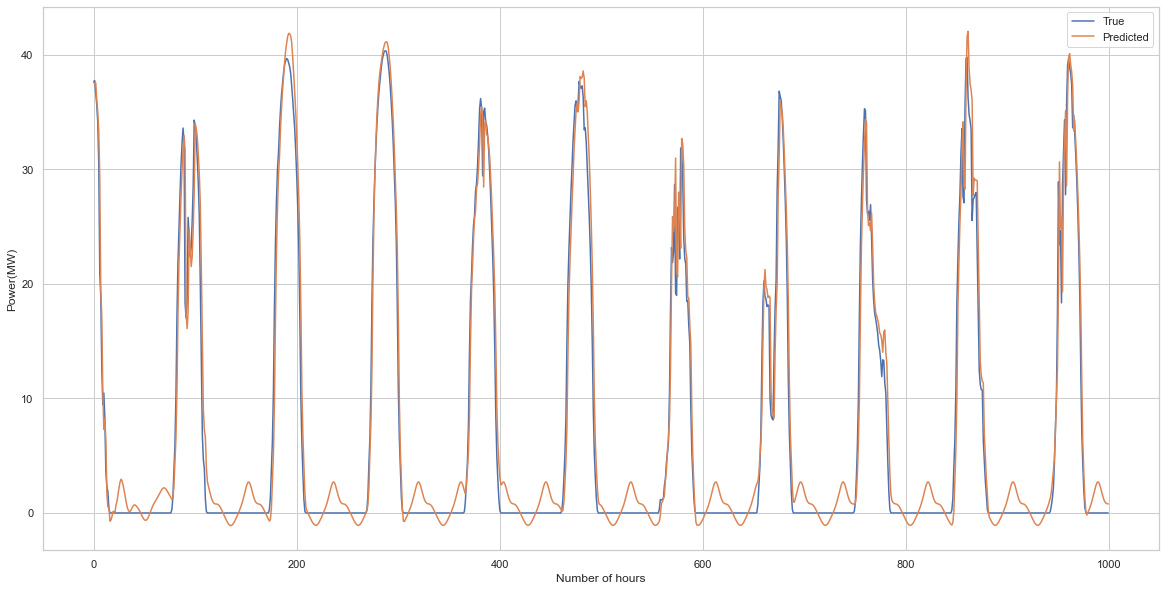

In [37]:
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:1000], label="True")
pyplot.plot(predictions_plot[0:1000], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power(MW)")
pyplot.savefig('./LSTM Solar Station')

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(expectations, predictions)

2.753183358761562

In [39]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(expectations, predictions)



6.3875000843696474

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(expectations, predictions)



12.754191918834914

In [41]:
import numpy as np

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)
smape(expectations, predictions)

32.59700476862865